In [9]:
from lxml import etree
from collections import OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
import pickle
import numpy as np
import datetime
import seaborn as sns
sns.set()


# In[41]:


datamap=OrderedDict()
datamap["android"]="android.stackexchange.com"
datamap["dba"]="dba.stackexchange.com"
datamap["softwareEng"]="softwareengineering.stackexchange.com"
datamap["serverfault"]= "serverfault.com"
datamap["superuser"]="superuser.com"
datamap["stackoverflow"]="stackoverflow.com-"

def process_date(d11,d22):

    d1 = datetime.datetime.strptime(d11, '%Y-%m-%dT%H:%M:%S.%f')
  
    d2 = datetime.datetime.strptime(d22, '%Y-%m-%dT%H:%M:%S.%f')
    
    diff = (d2 - d1).total_seconds() / 60
    #print(d1,d2,diff)
    return diff
 
def writeBoxplot(web,bp):
    c=1
    f=open("tdata/boxData_"+web+".csv","w")
    f.write("website,year,min,max,q1,q2,q3\n")
    for m,m2,i in zip(bp['boxes'],bp['medians'],range(0,len(bp['caps']),2)):
        ldata=m.get_ydata()
        q3=ldata[2]
        q1=ldata[0]
        med=m2.get_ydata()[0]   
        minx=bp['caps'][i].get_ydata()[0]
        maxx=bp['caps'][i+1].get_ydata()[0]
        print(minx,maxx,q1,med,q3)
        boxinfo=[minx,maxx,q1,med,q3]
        f.write(fname+","+ym[str(c)]+","+str(",".join([str(i) for i in boxinfo]))+"\n")
        c+=1
    f.close()
    
    
def boxplt(data,fname,title):
    plt.close()
    plt.clf()
    keypick=[i for i in range(1,len(data)+1)]
    plt.subplots(figsize=(6,3),dpi=600)
    bp=plt.boxplot([data[i] for i in data])
    writeBoxplot(fname,bp)
    plt.xlabel("Years")
    plt.ylabel("Time (in mins)")
    plt.xticks(keypick,[i for i in data])  
    plt.title(fname.upper())
    plt.ylim(-10,4000)
    plt.show()
    
    
    
 
    
def meanPlot(data,fname):
    plt.close()
    plt.clf()
    f=open("tdata/"+fname+".timeData.csv","w")
    f.write("Year,Mean,StD\n")
    for i in data:
        f.write(i+","+str(np.mean(data[i]))+","+str(np.std(data[i]))+"\n")
    keypick=[i for i in range(1,len(data)+1)]
    plt.subplots(figsize=(6,3),dpi=600)
    plt.bar(keypick,[np.mean(data[i]) for i in data],label="Mean",color="b")
    plt.plot(keypick,[np.std(data[i]) for i in data],color="g")
    plt.scatter(keypick,[np.std(data[i]) for i in data],label="StD",color="g")
    plt.legend(loc="upper right")
    plt.xlabel("Years")
    plt.ylabel("Time (in mins)")
    plt.xlim(0,11)
    print(keypick,[i for i in data])
    plt.xticks(keypick,[i for i in data])
   
    plt.title(fname.upper())
    plt.show()
    
def init_data():
    data=OrderedDict()
    syear=2008
    eyear=2017
    for i in range(syear,eyear+1):
        data[str(i)]=[]
    return data

In [2]:
import operator
def distribute_posts(fname):
    zero,total=0.0,0.0
    wrapper={}
    
    fzero=open("zero."+fname+".csv","w")
    if fname=="stackoverflow" and datamap[fname]=="stackoverflow.com-":
        datamap[fname]=datamap[fname]+"Posts"   
    

    f=open("time."+fname+".txt","r")
    data=init_data()
    for l in f:
        row=l.split(",")
        year=row[1].split("T")[0].split("-")[0]
        diff=process_date(row[1],row[2].strip())
        if year not in data:
            data[year]=[]
        data[year].append(diff)
        if diff==0:
            fzero.write(row[0]+"\n")
            zero+=1
        total+=1
        if fname=="softwareEng":
            wrapper[row[0]]=diff
#     print(data)
    print(zero,total,zero*100/total)
    
    if fname=="softwareEng":
       
        x=sorted(wrapper.items(),key=operator.itemgetter(1))
        #print(x)
    fzero.close()
    meanPlot(data,fname)
    boxplt(data,fname,fname)
 
        

In [8]:
process_date("2011-03-9T22:53:14.603","2011-03-09T22:53:14.603")

0.0

0.0 50.0 0.0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


c:\program files (x86)\python36-32\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files (x86)\python36-32\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\program files (x86)\python36-32\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\program files (x86)\python36-32\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\program files (x86)\python36-32\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


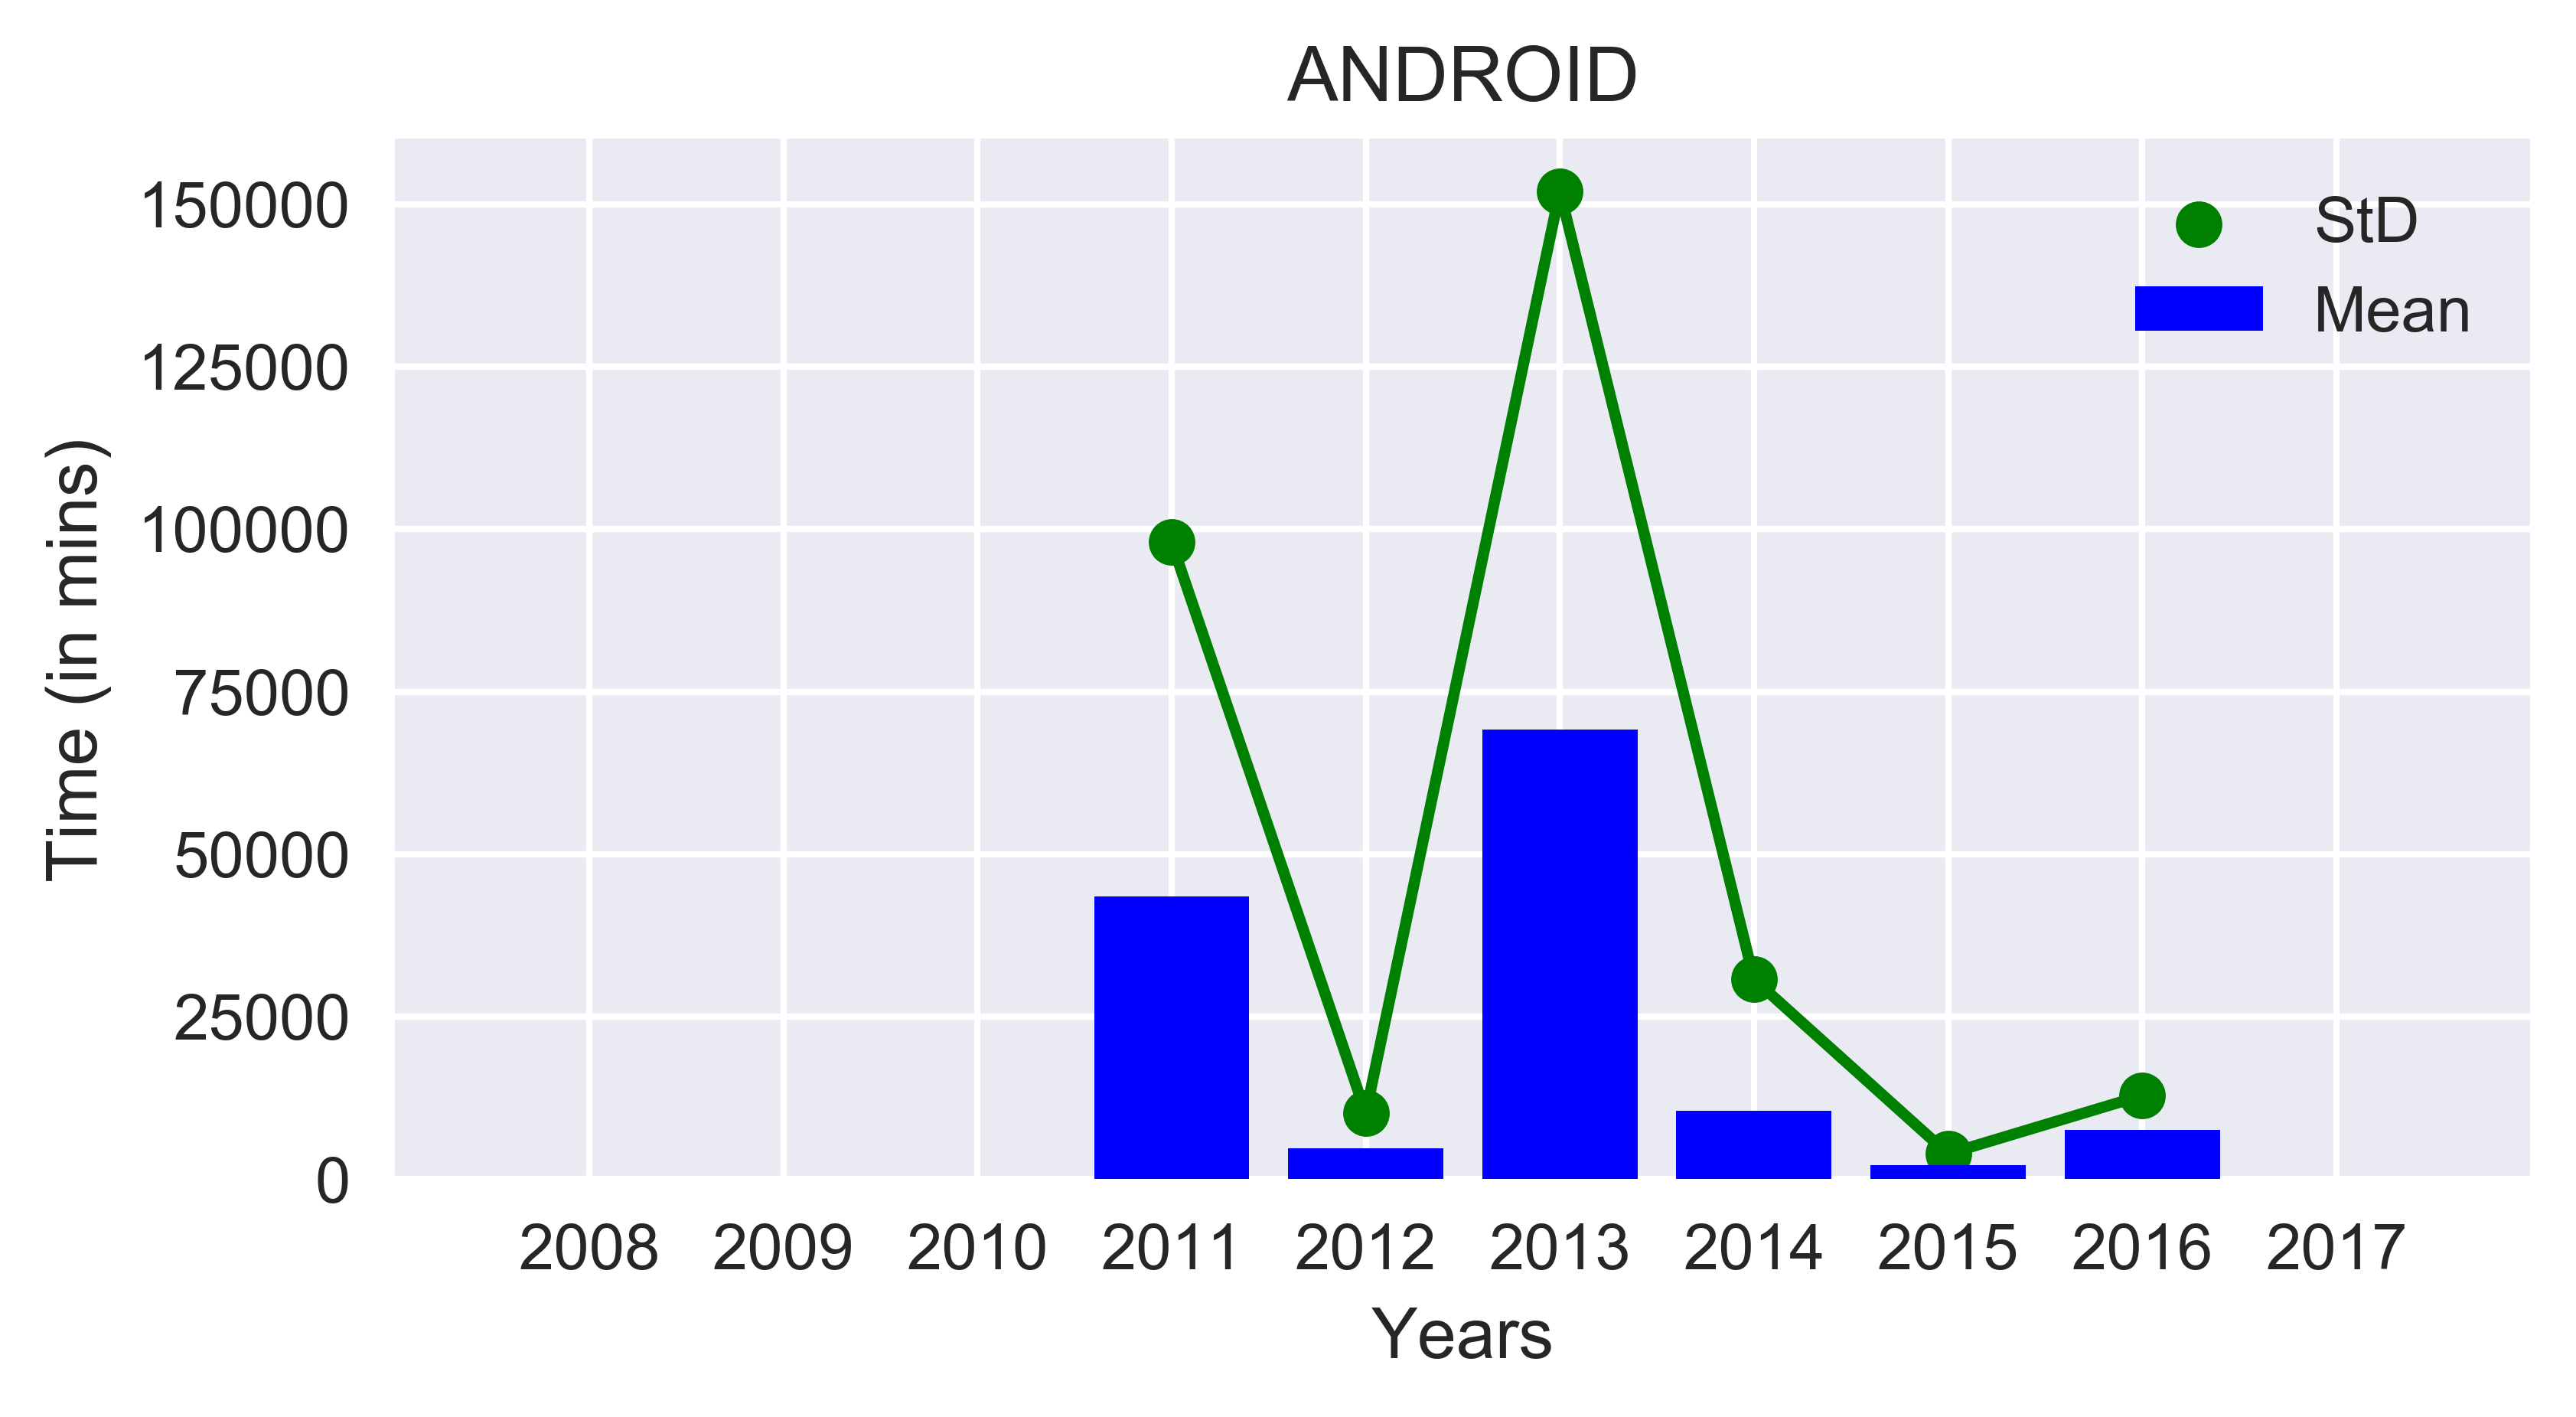

nan nan nan nan nan
nan nan nan nan nan
nan nan nan nan nan
38.2773333333 8738.37571667 727.423216667 3093.39321667 8738.37571667
21.3083333333 1466.06521667 81.5187291667 113.261666667 1166.95081667
8.02021666667 24985.4120667 99.9858333333 4475.34216667 19366.9412583
4.29038333333 2447.97155 63.7638166667 292.3028 1069.1530125
4.02121666667 1518.31333333 135.341633333 790.494883333 1204.663275
21.8549 4156.9696 125.874 277.74255 4156.9696
nan nan nan nan nan


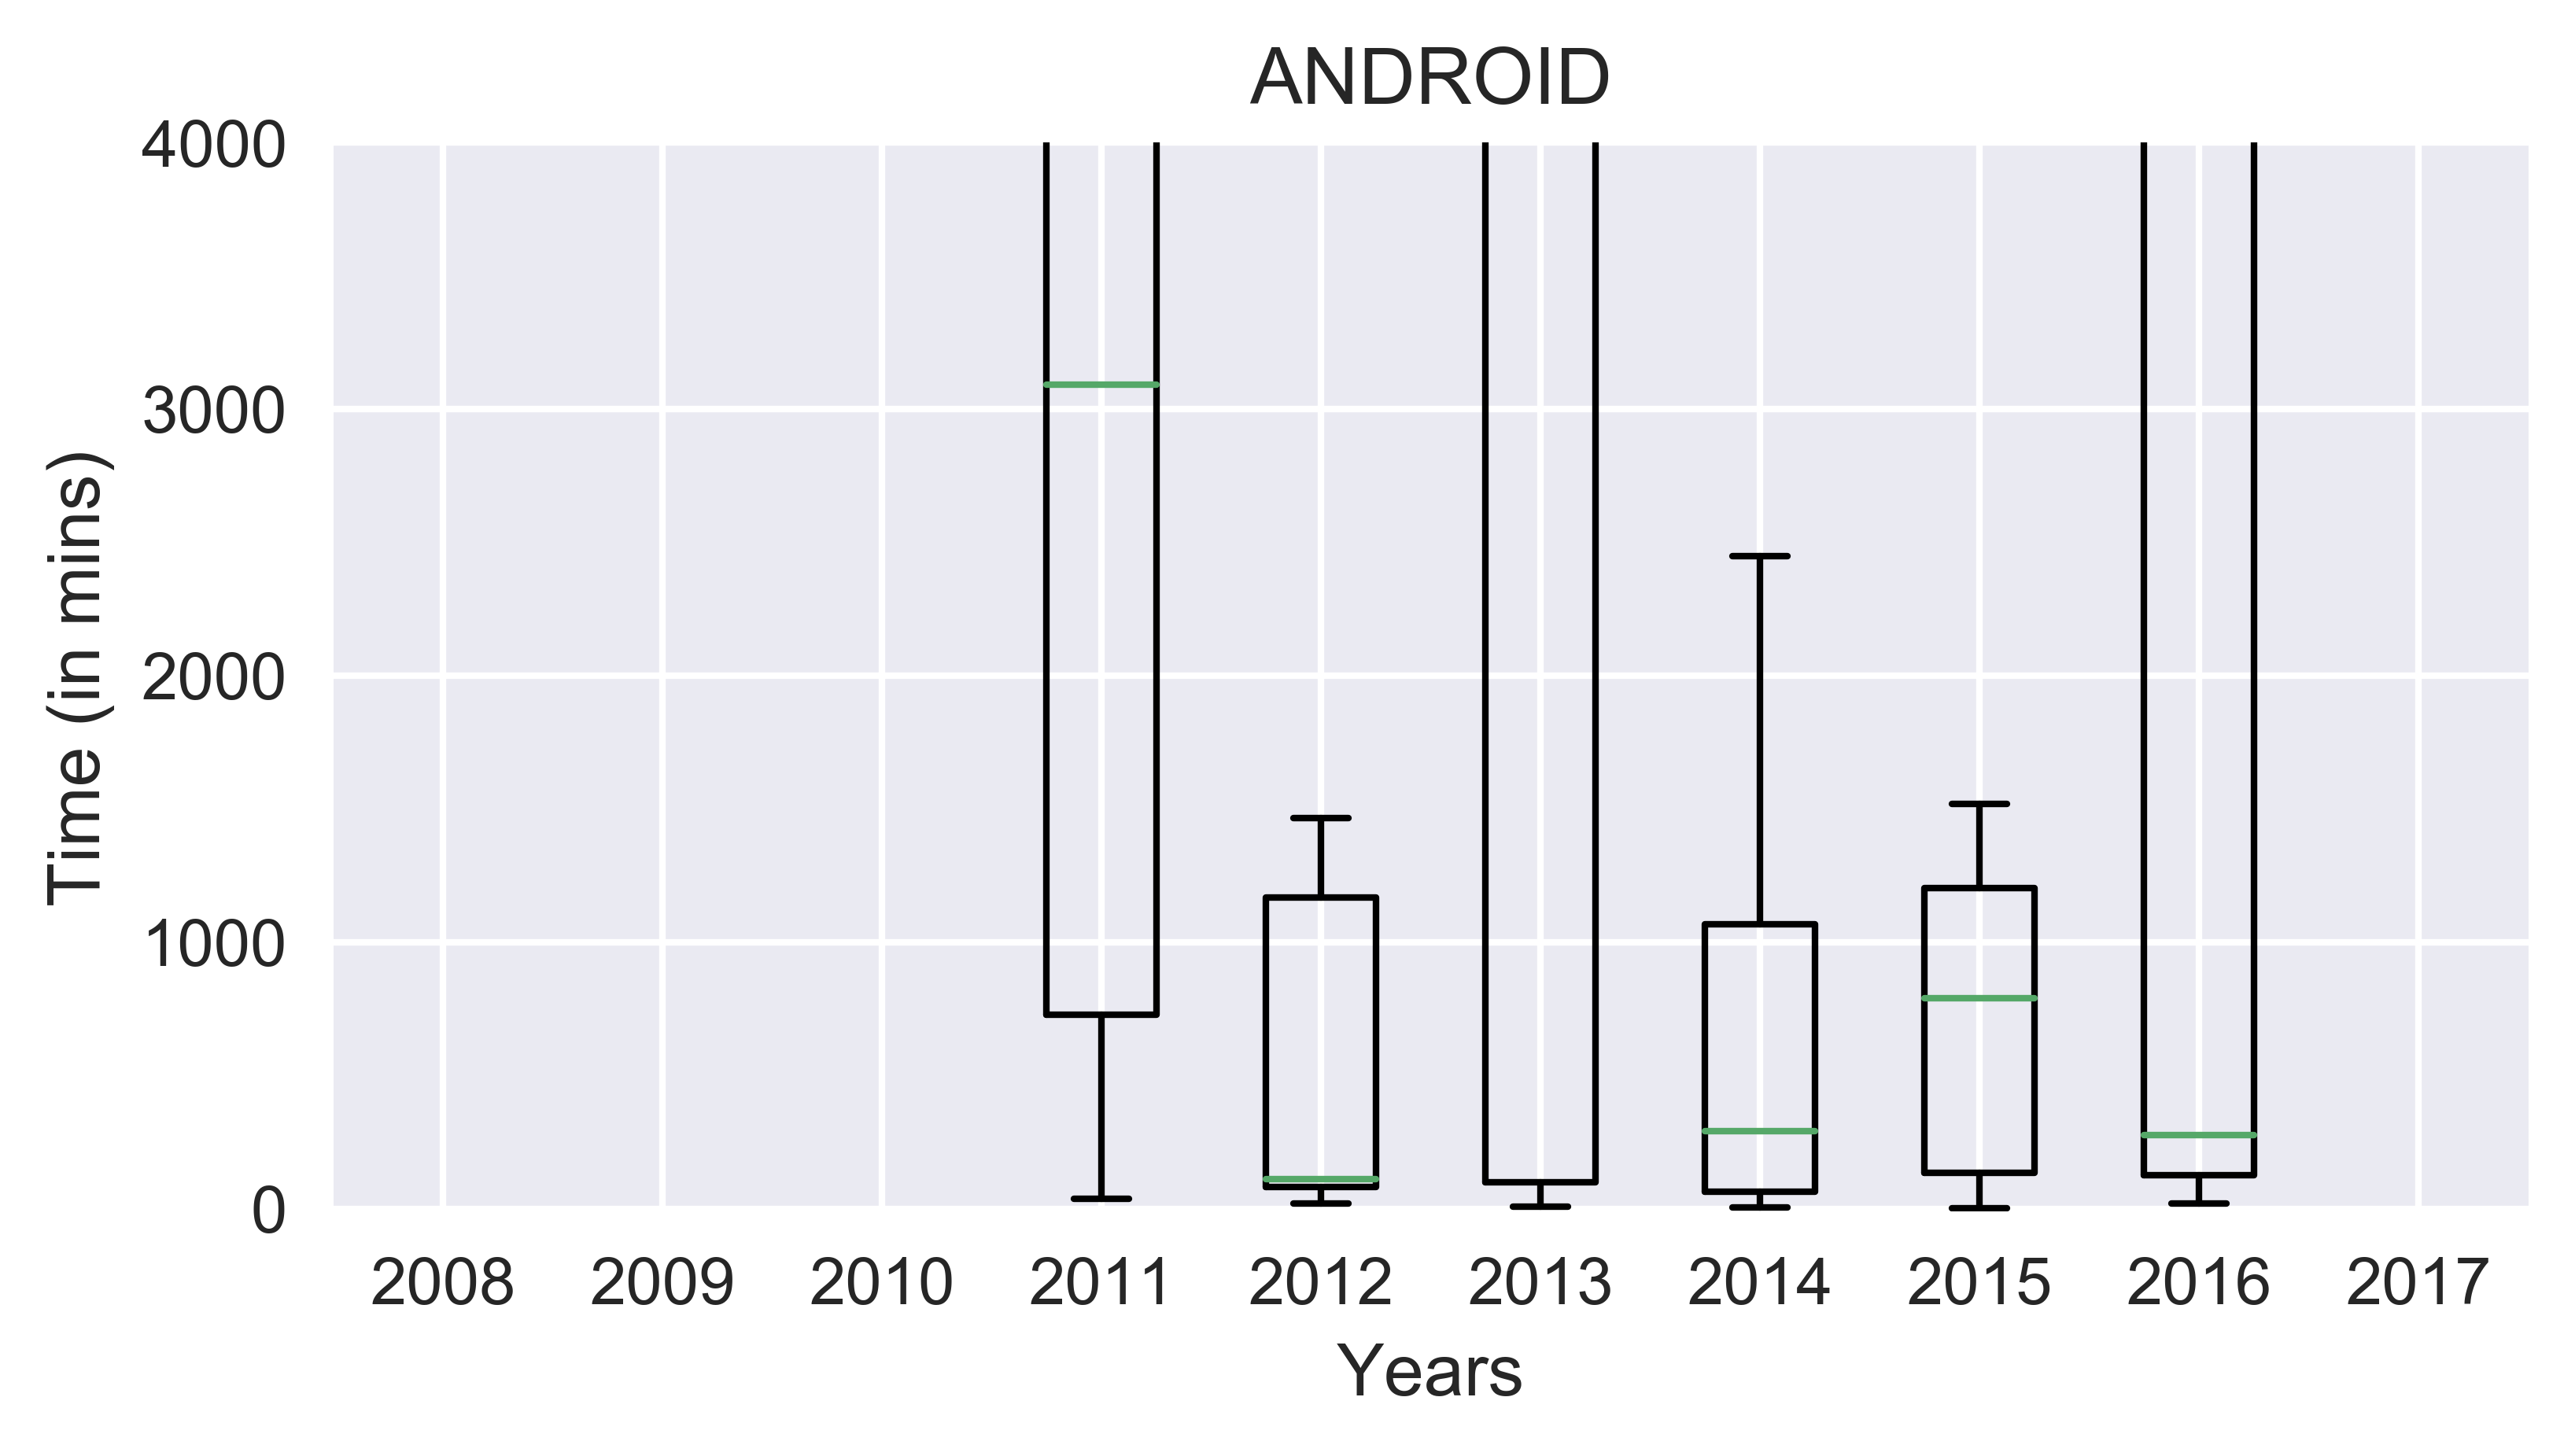

2.0 555.0 0.36036036036036034
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


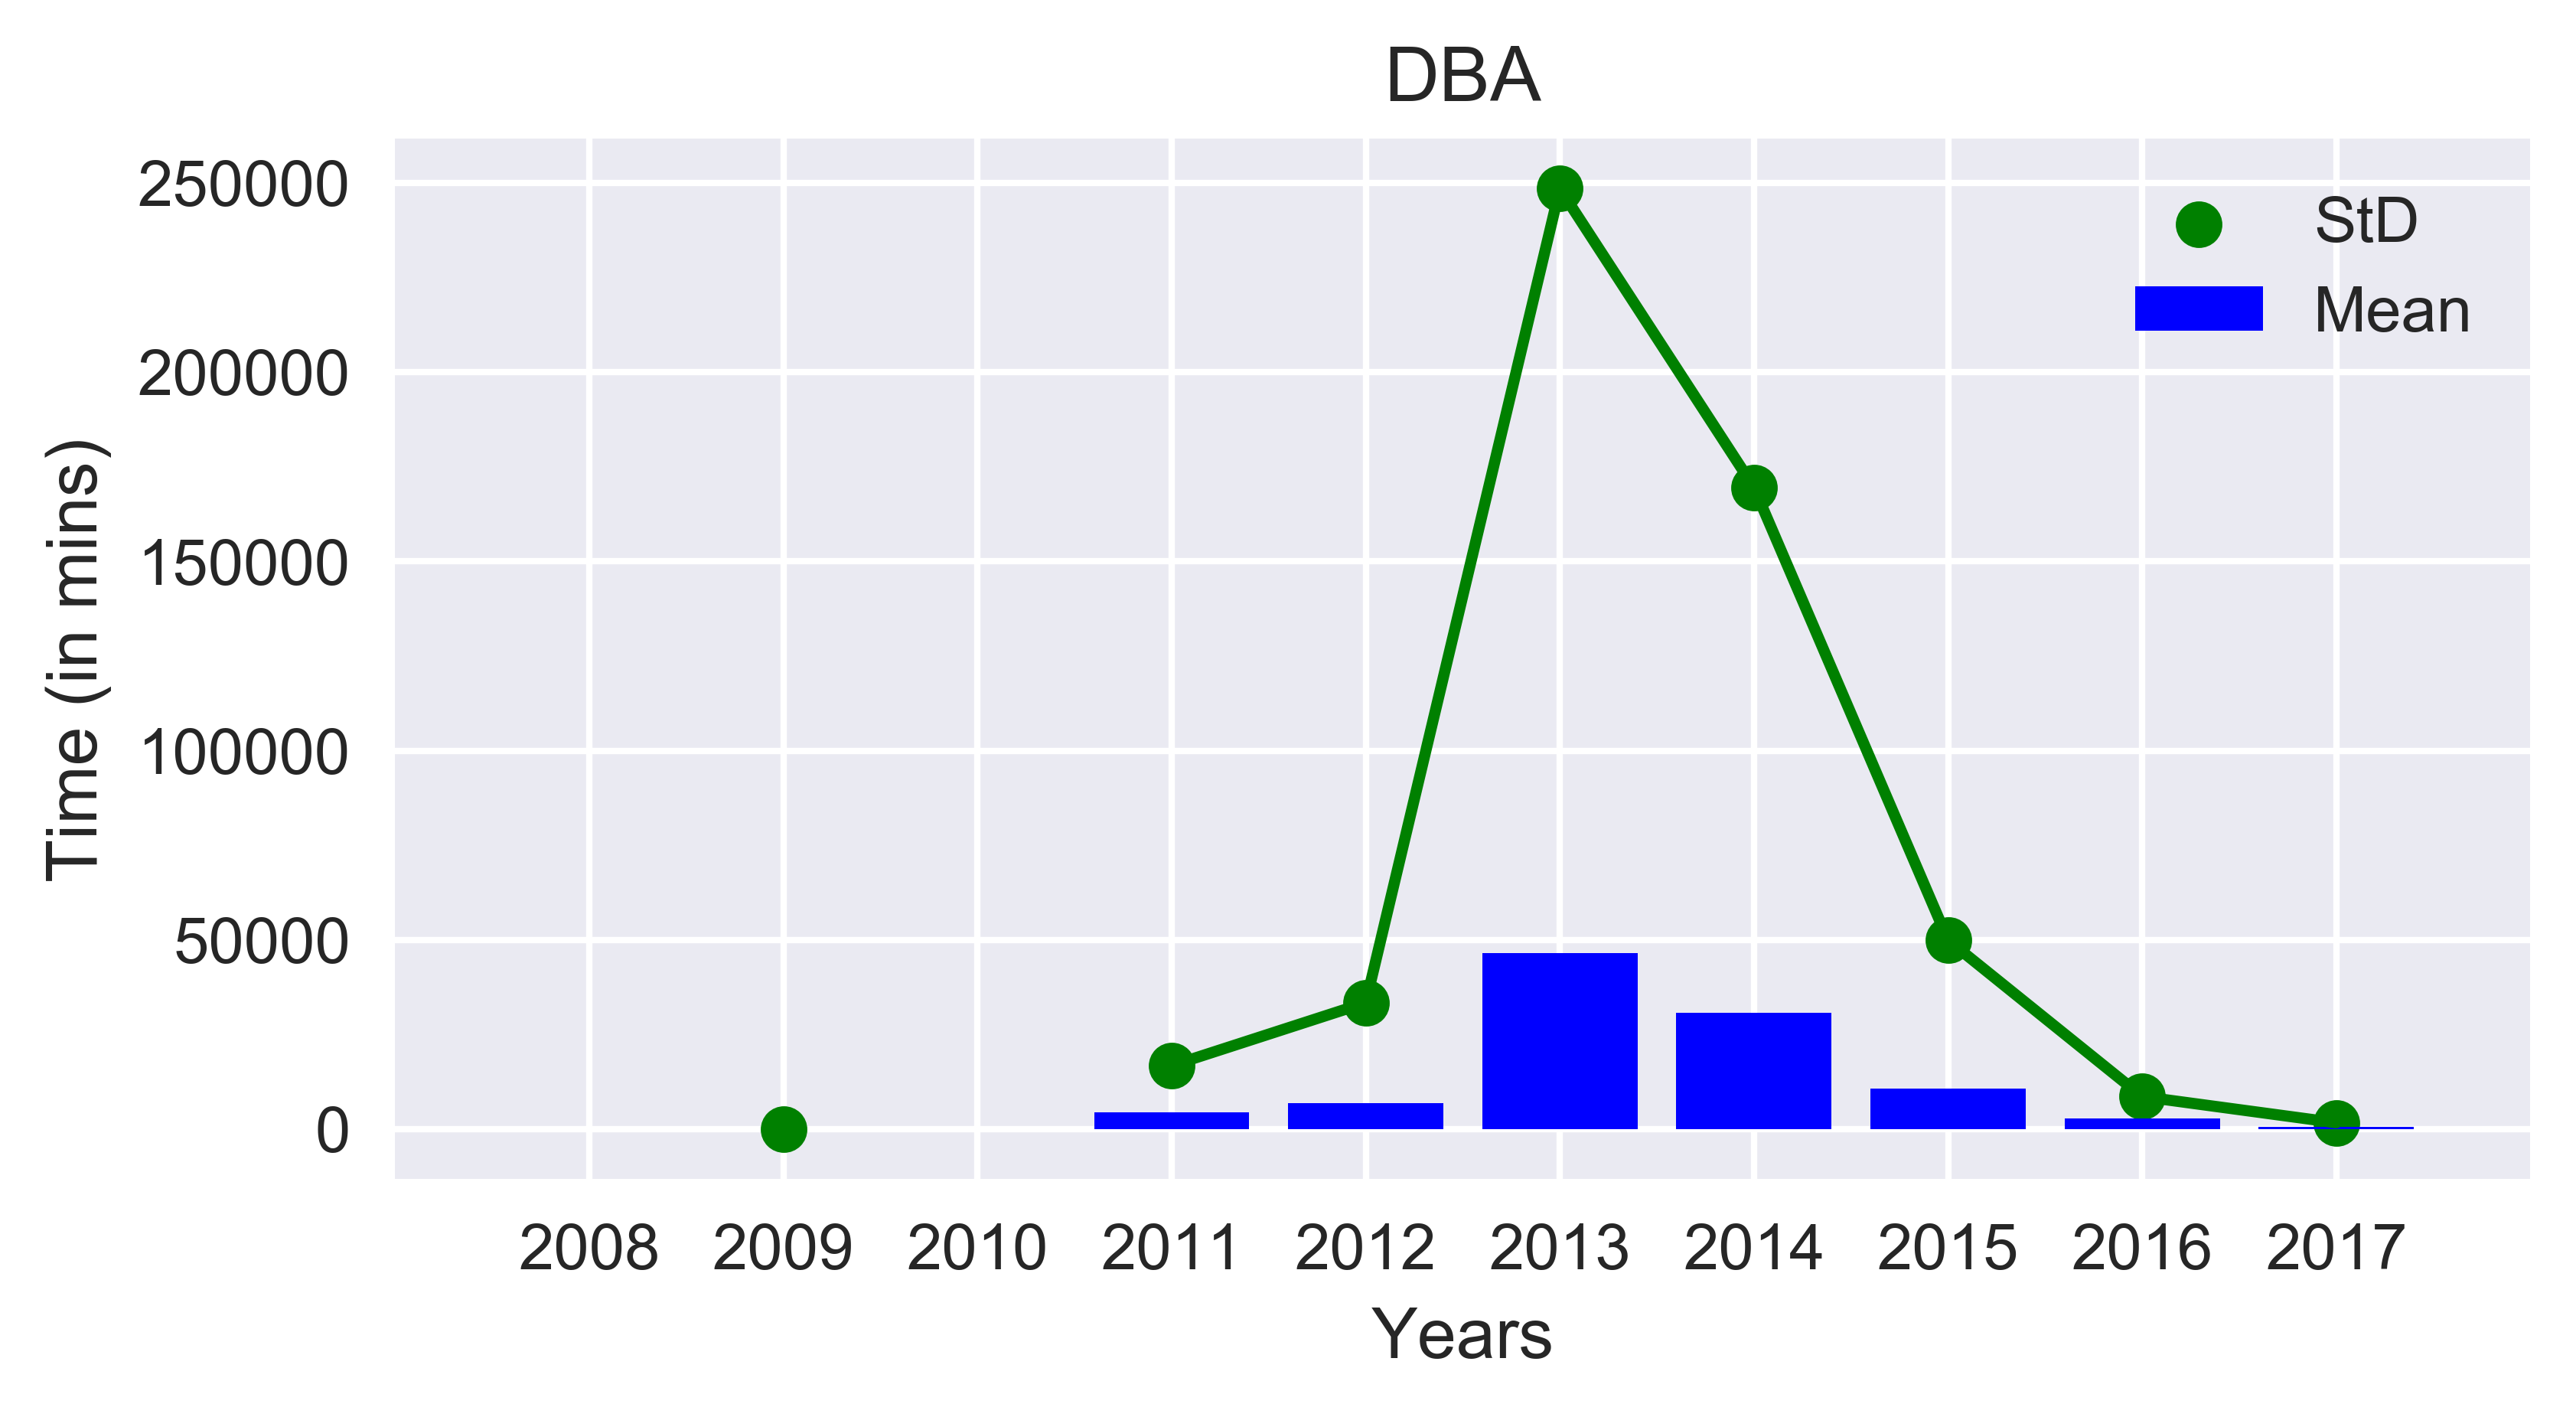

nan nan nan nan nan
8.00988333333 8.00988333333 8.00988333333 8.00988333333 8.00988333333
nan nan nan nan nan
2.94888333333 547.743283333 22.3731791667 68.0660583333 383.264158333
0.0 1131.27211667 23.1442208333 84.749975 487.479554167
4.9615 702.3095 20.7923833333 74.6467166667 335.19
1.518 1099.02745 25.9644208333 122.032216667 532.229608333
0.0 1274.75423333 41.45965 112.558675 561.572066667
3.5366 3531.15233333 47.7857125 215.49775 1574.91051667
0.942 1062.924 29.1294166667 101.447333333 453.705033333


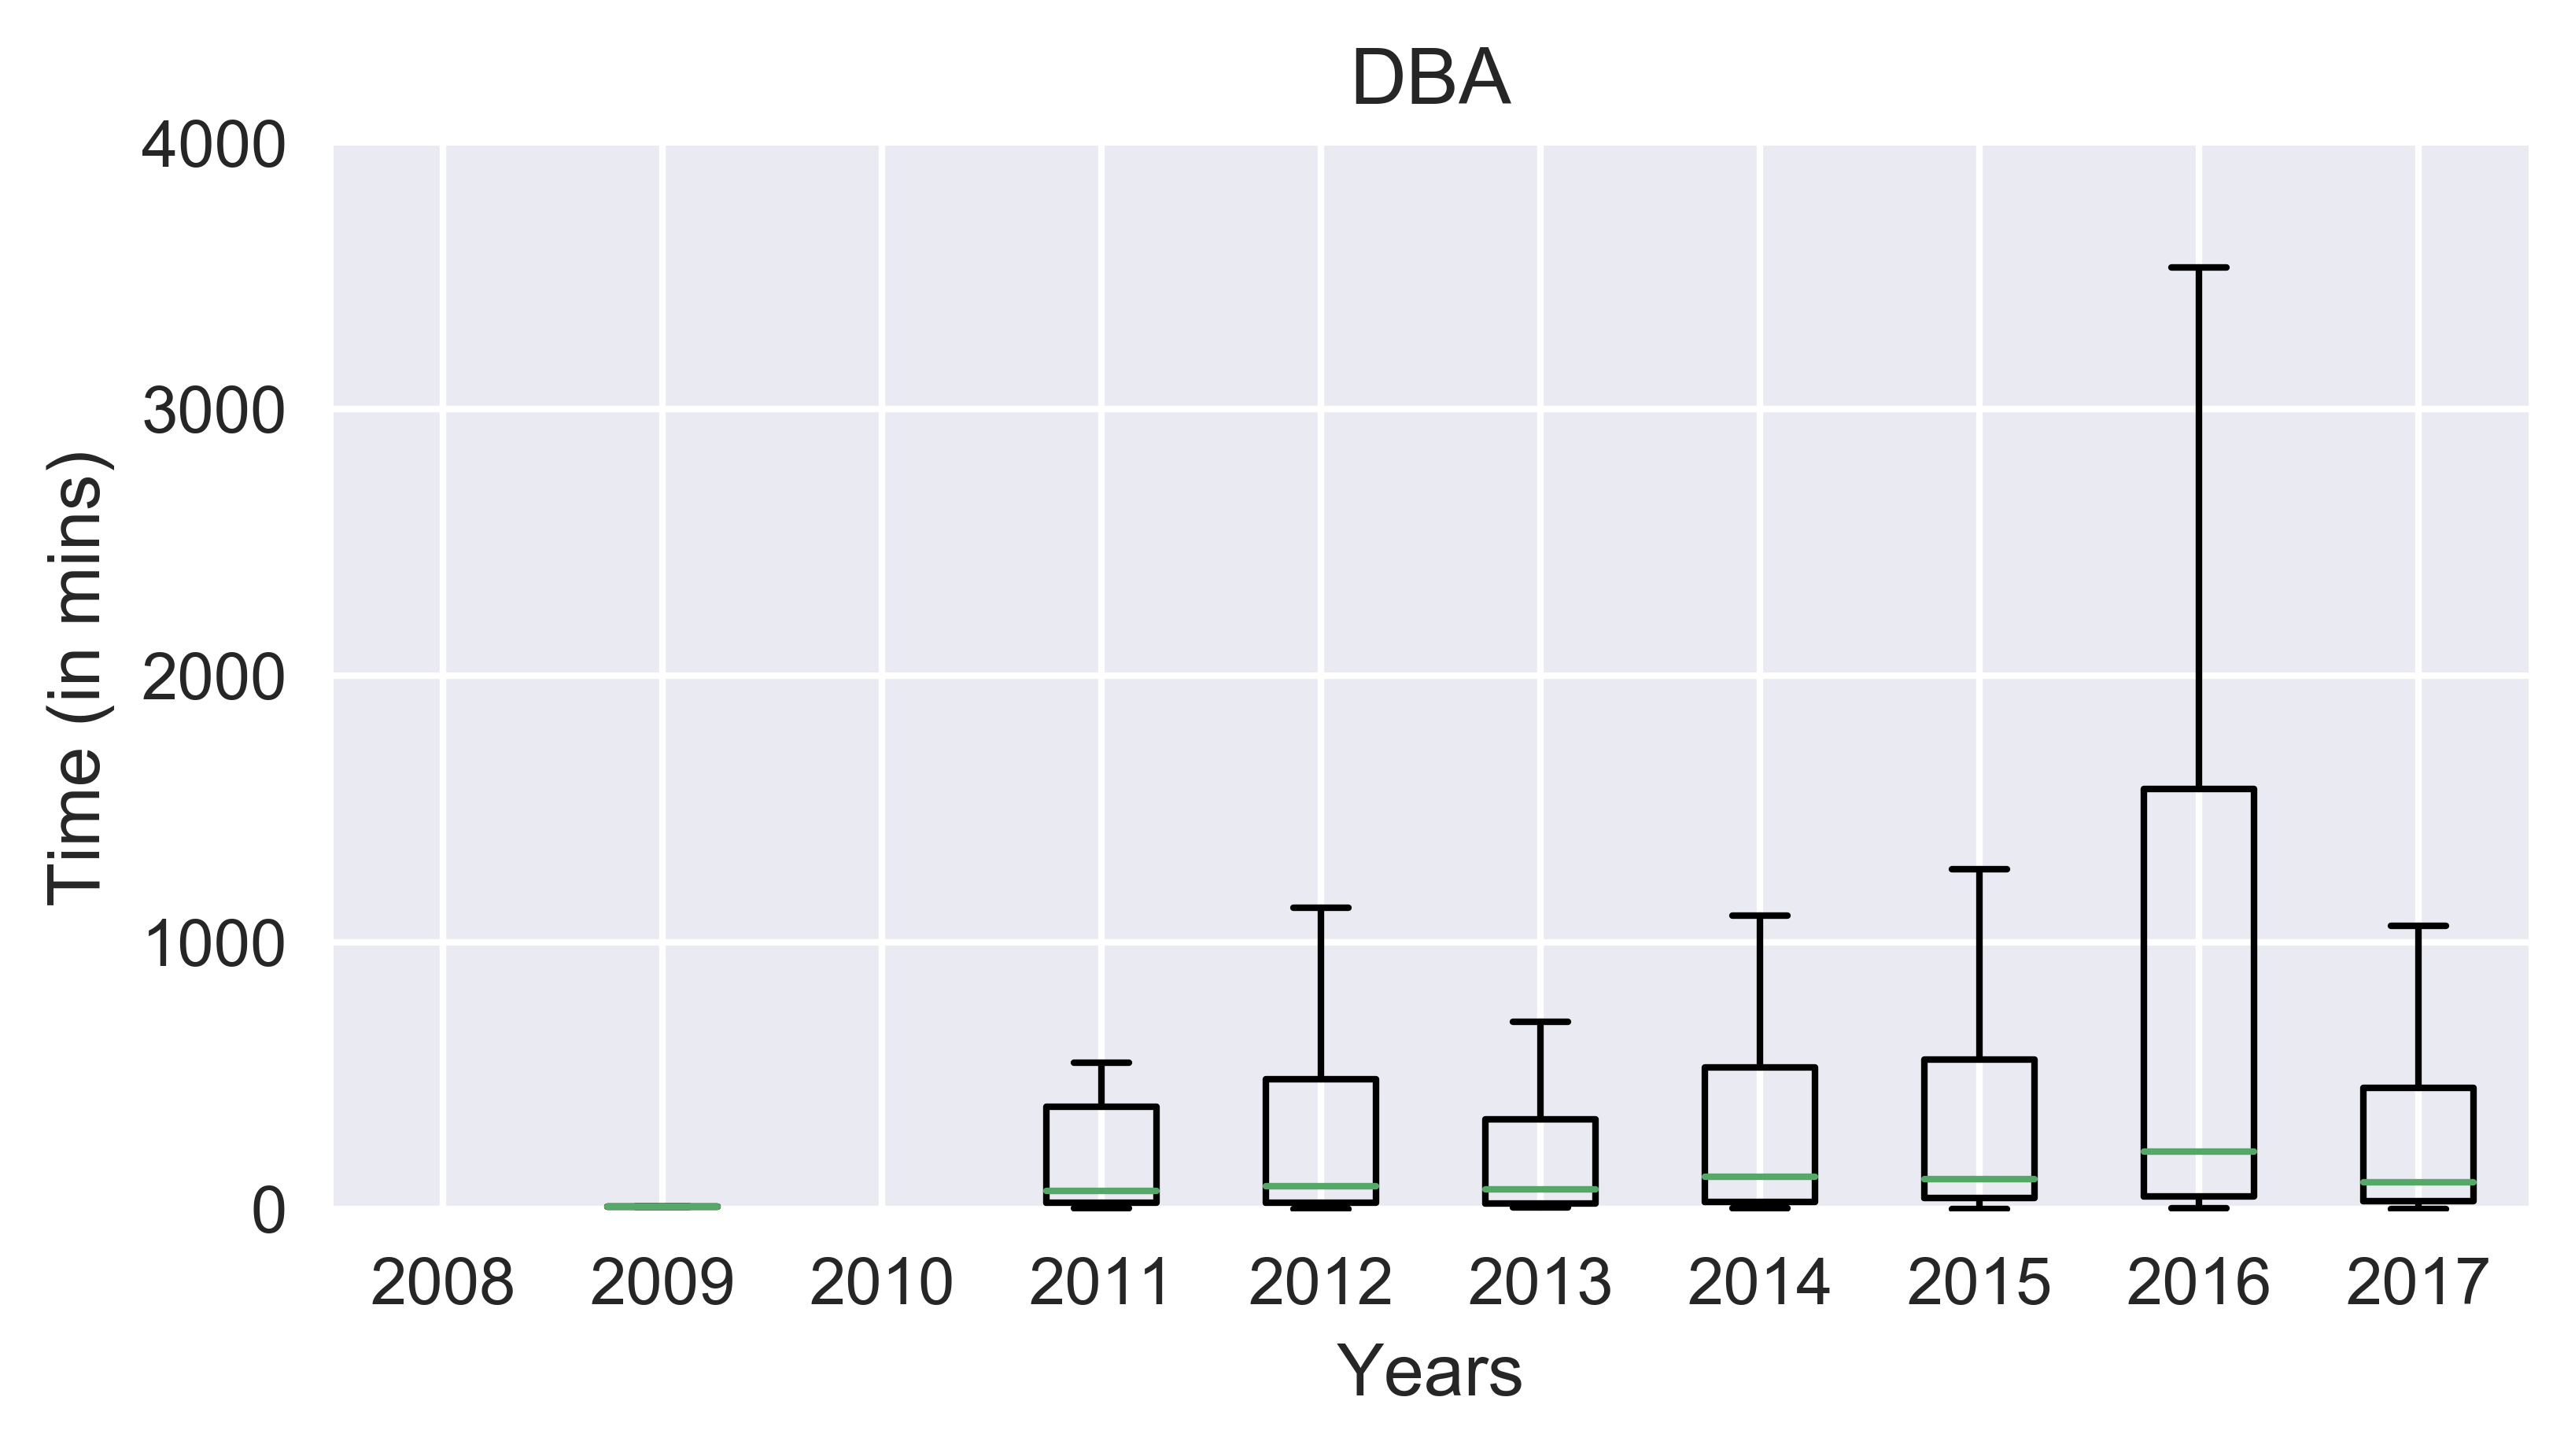

0.0 110.0 0.0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


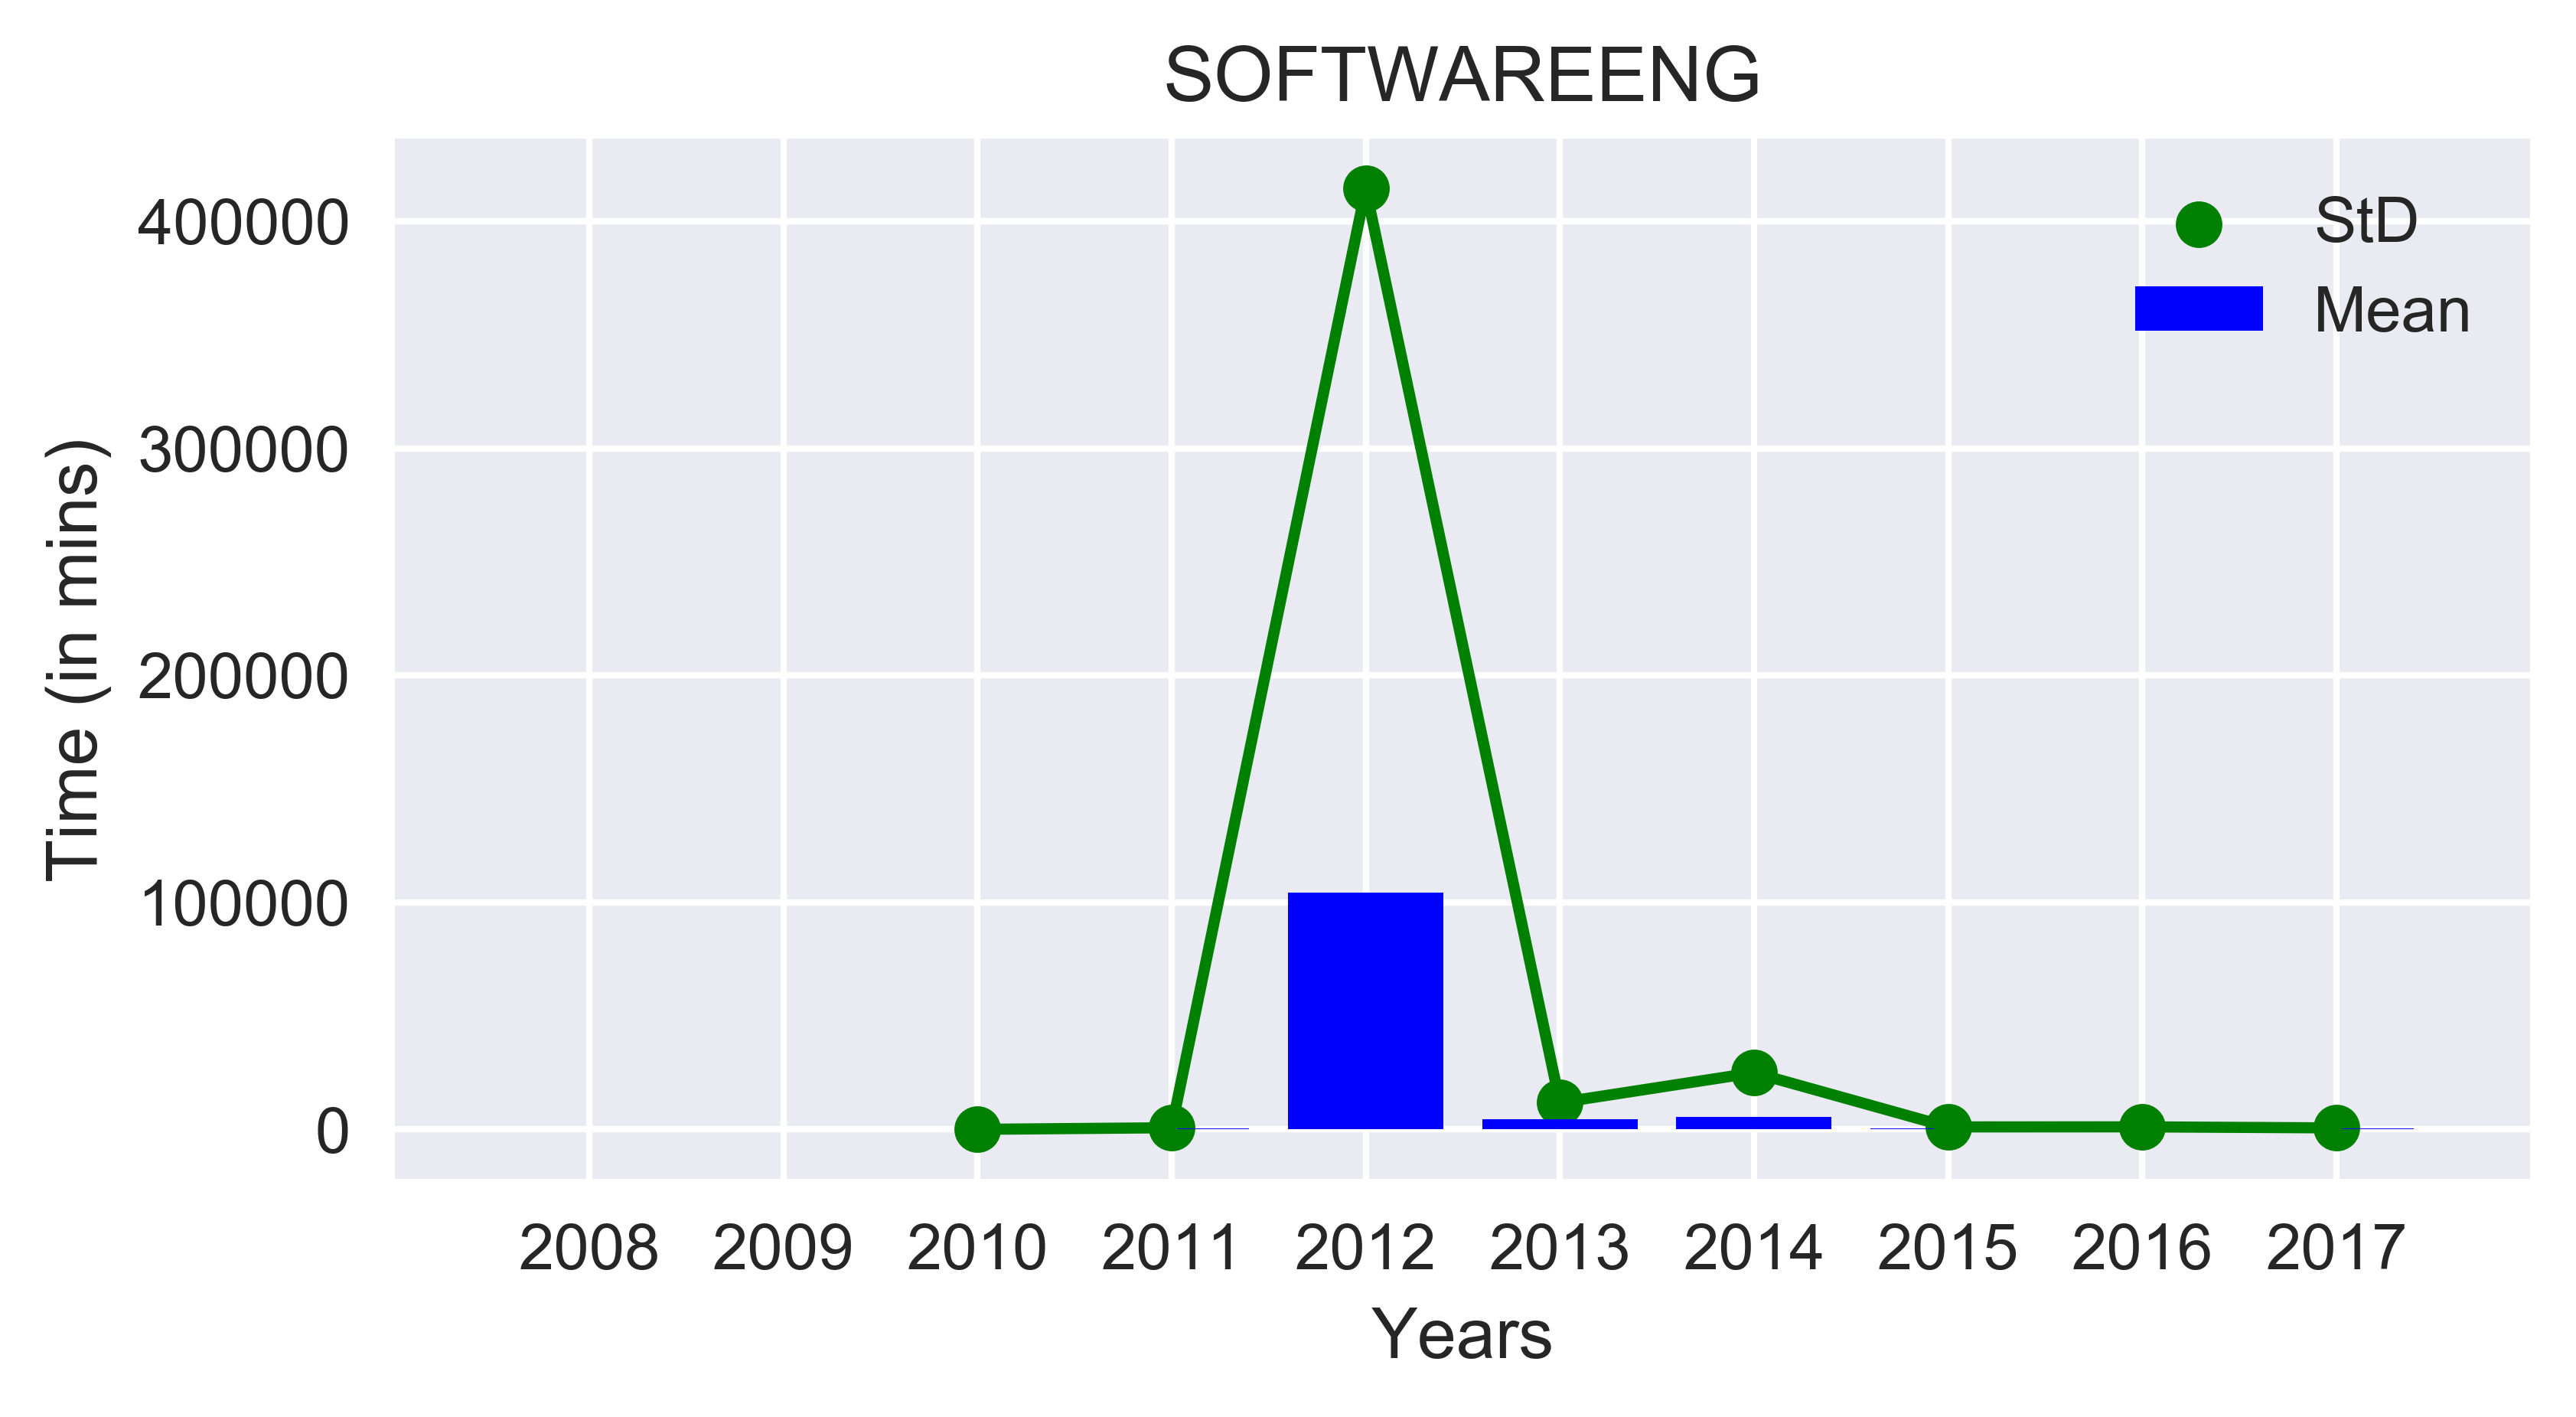

nan nan nan nan nan
nan nan nan nan nan
20.284 114.966266667 43.9545666667 67.6251333333 91.2957
1.59876666667 176.41845 12.6192833333 43.97645 113.483833333
7.23371666667 183.569233333 23.7122166667 44.6007166667 183.569233333
5.50766666667 1186.16166667 10.6181166667 63.82045 754.642216667
8.35045 169.777883333 22.7520125 58.3015 165.9081625
5.55966666667 346.52595 21.1343333333 52.3386666667 203.2661125
16.1957833333 1146.02533333 26.002375 32.535075 611.492220833
21.72755 2273.66605 66.8346666667 141.762783333 1051.07193333


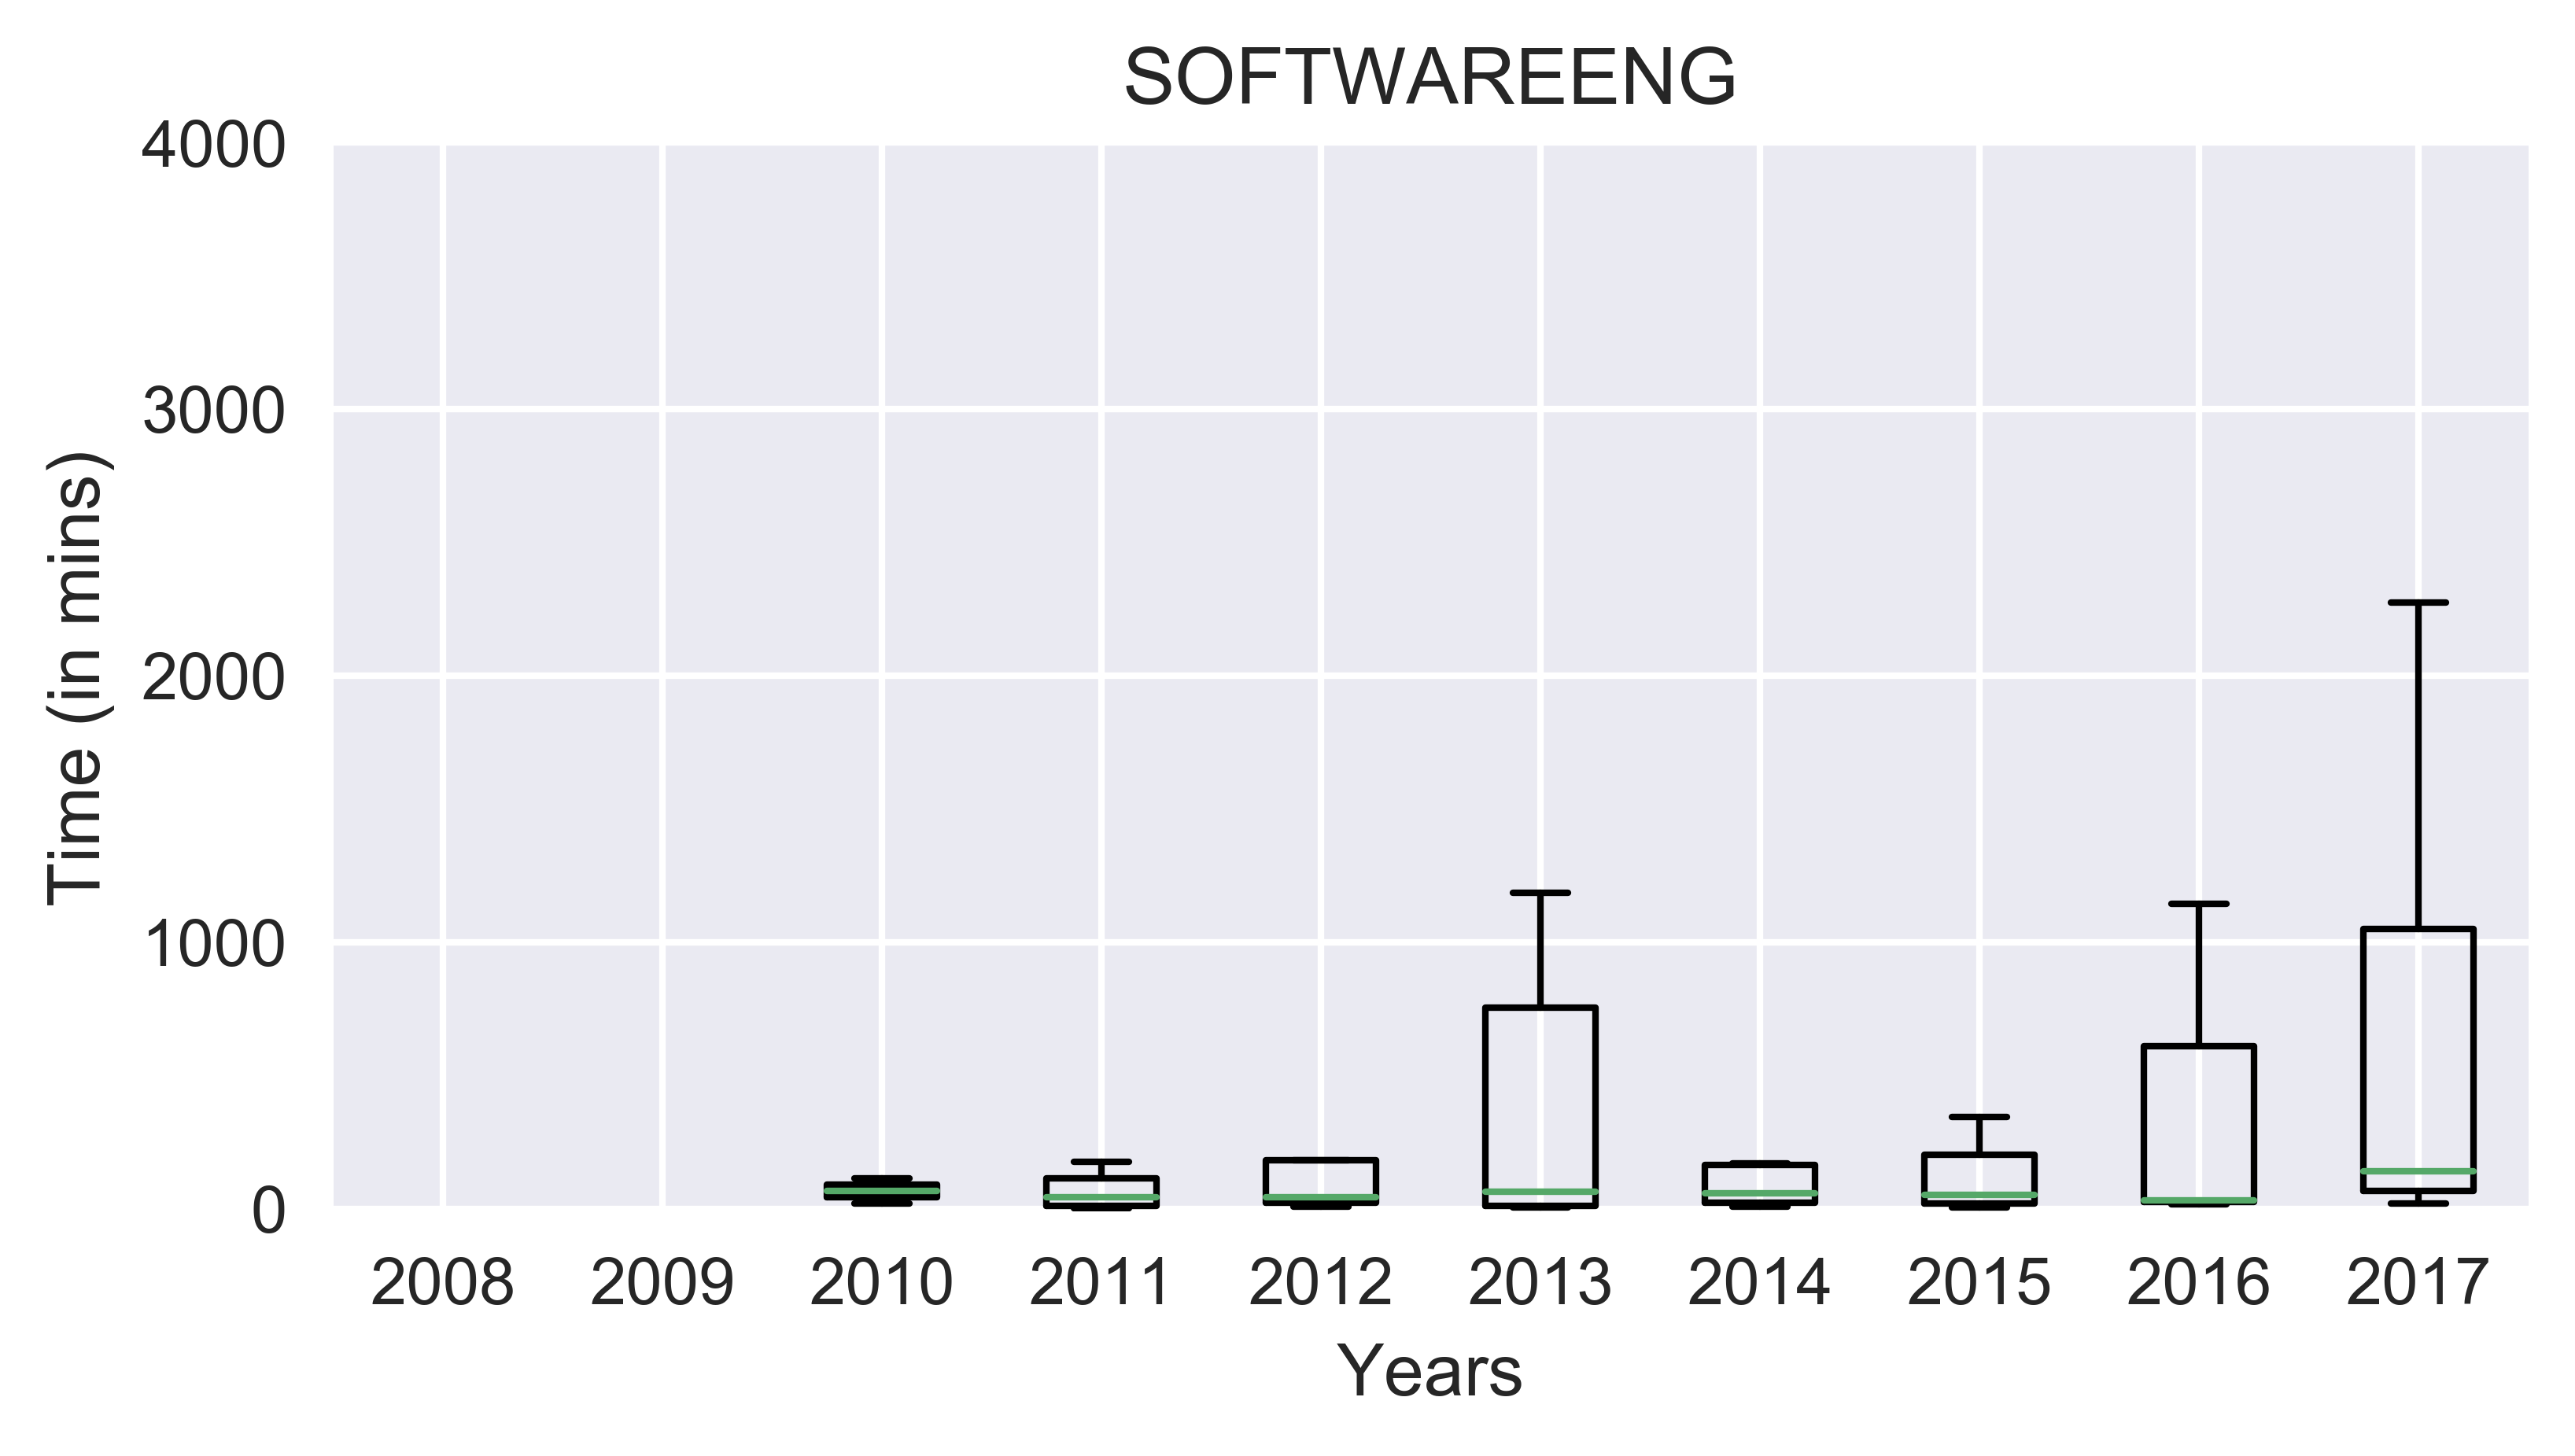

8.0 2163.0 0.36985668053629217
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


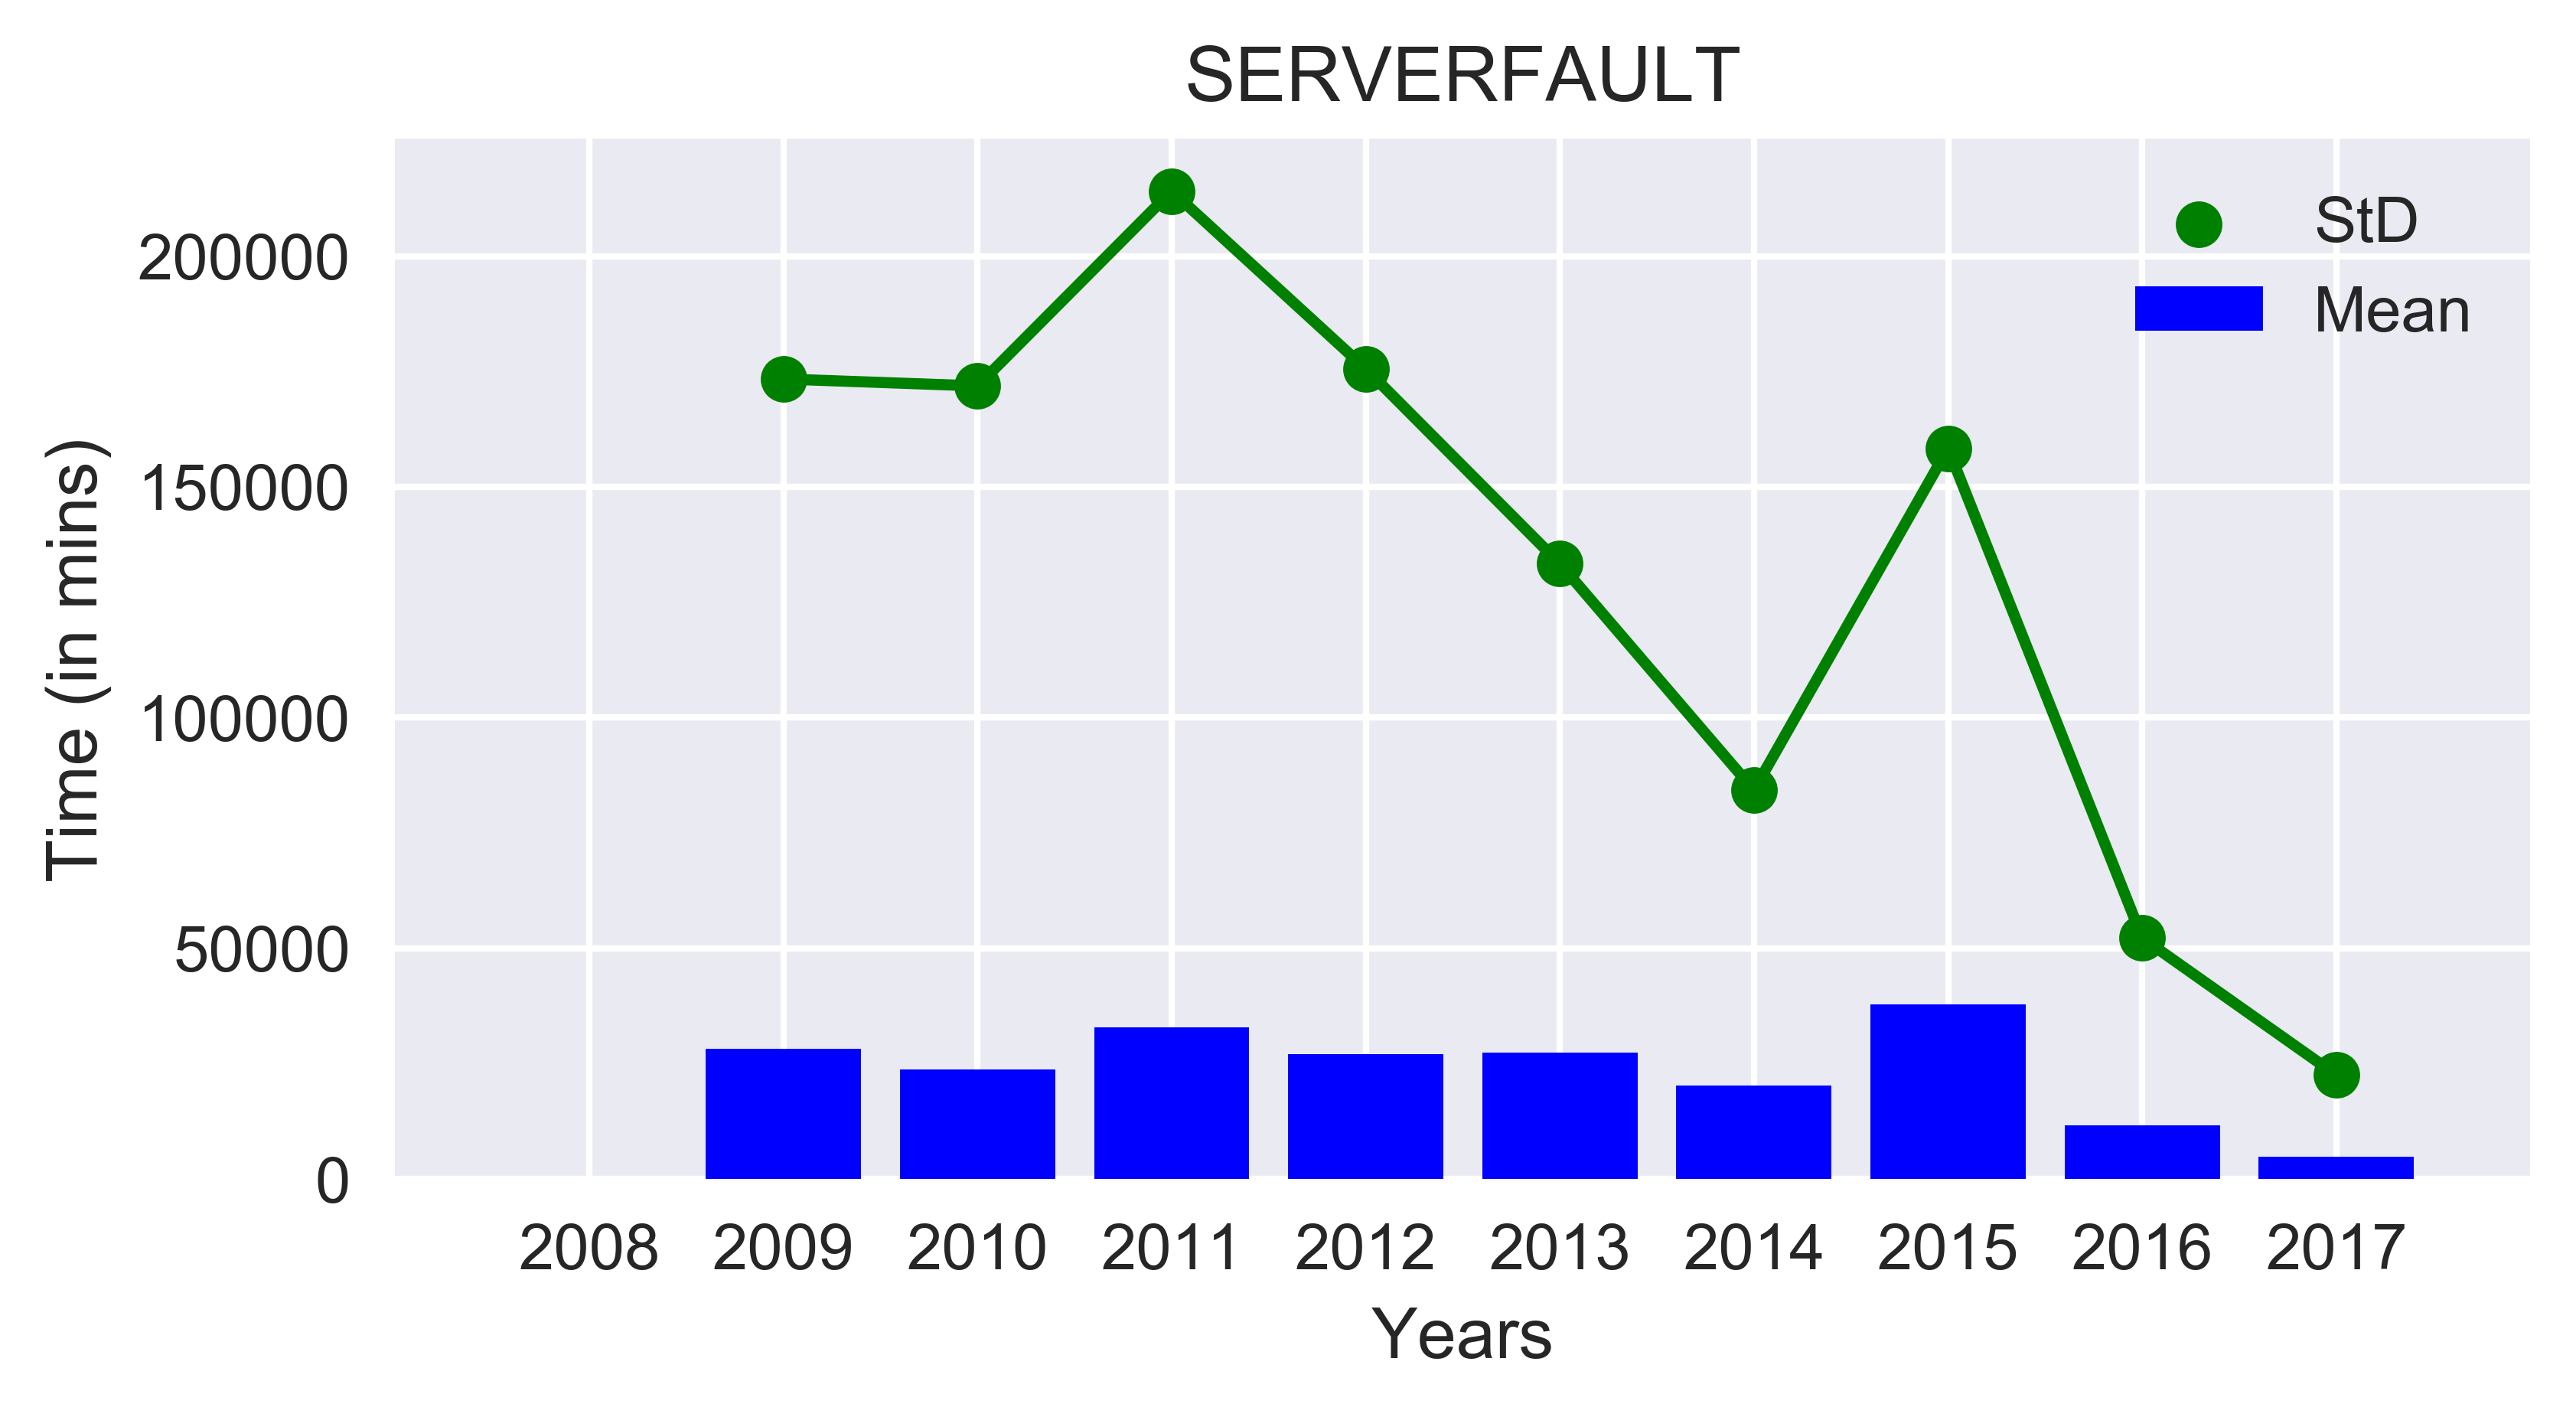

nan nan nan nan nan
0.00366666666667 837.502166667 12.7728625 60.5613083333 356.6081375
1.62605 967.230833333 14.5342 59.1928 415.9226125
1.40728333333 799.305233333 15.5708083333 52.49495 333.072141667
0.00445 2283.66561667 17.8237333333 71.60975 983.424516667
0.0 2189.71176667 21.730775 81.8394 1047.53538333
2.23356666667 3478.42166667 21.51405 84.3502333333 1636.00521667
0.0 4008.27421667 43.2103208333 218.71695 1904.02880833
0.0 4154.601 27.7108083333 191.903333333 1767.79305
0.0 2587.25221667 37.5428583333 97.9900833333 1250.16263333


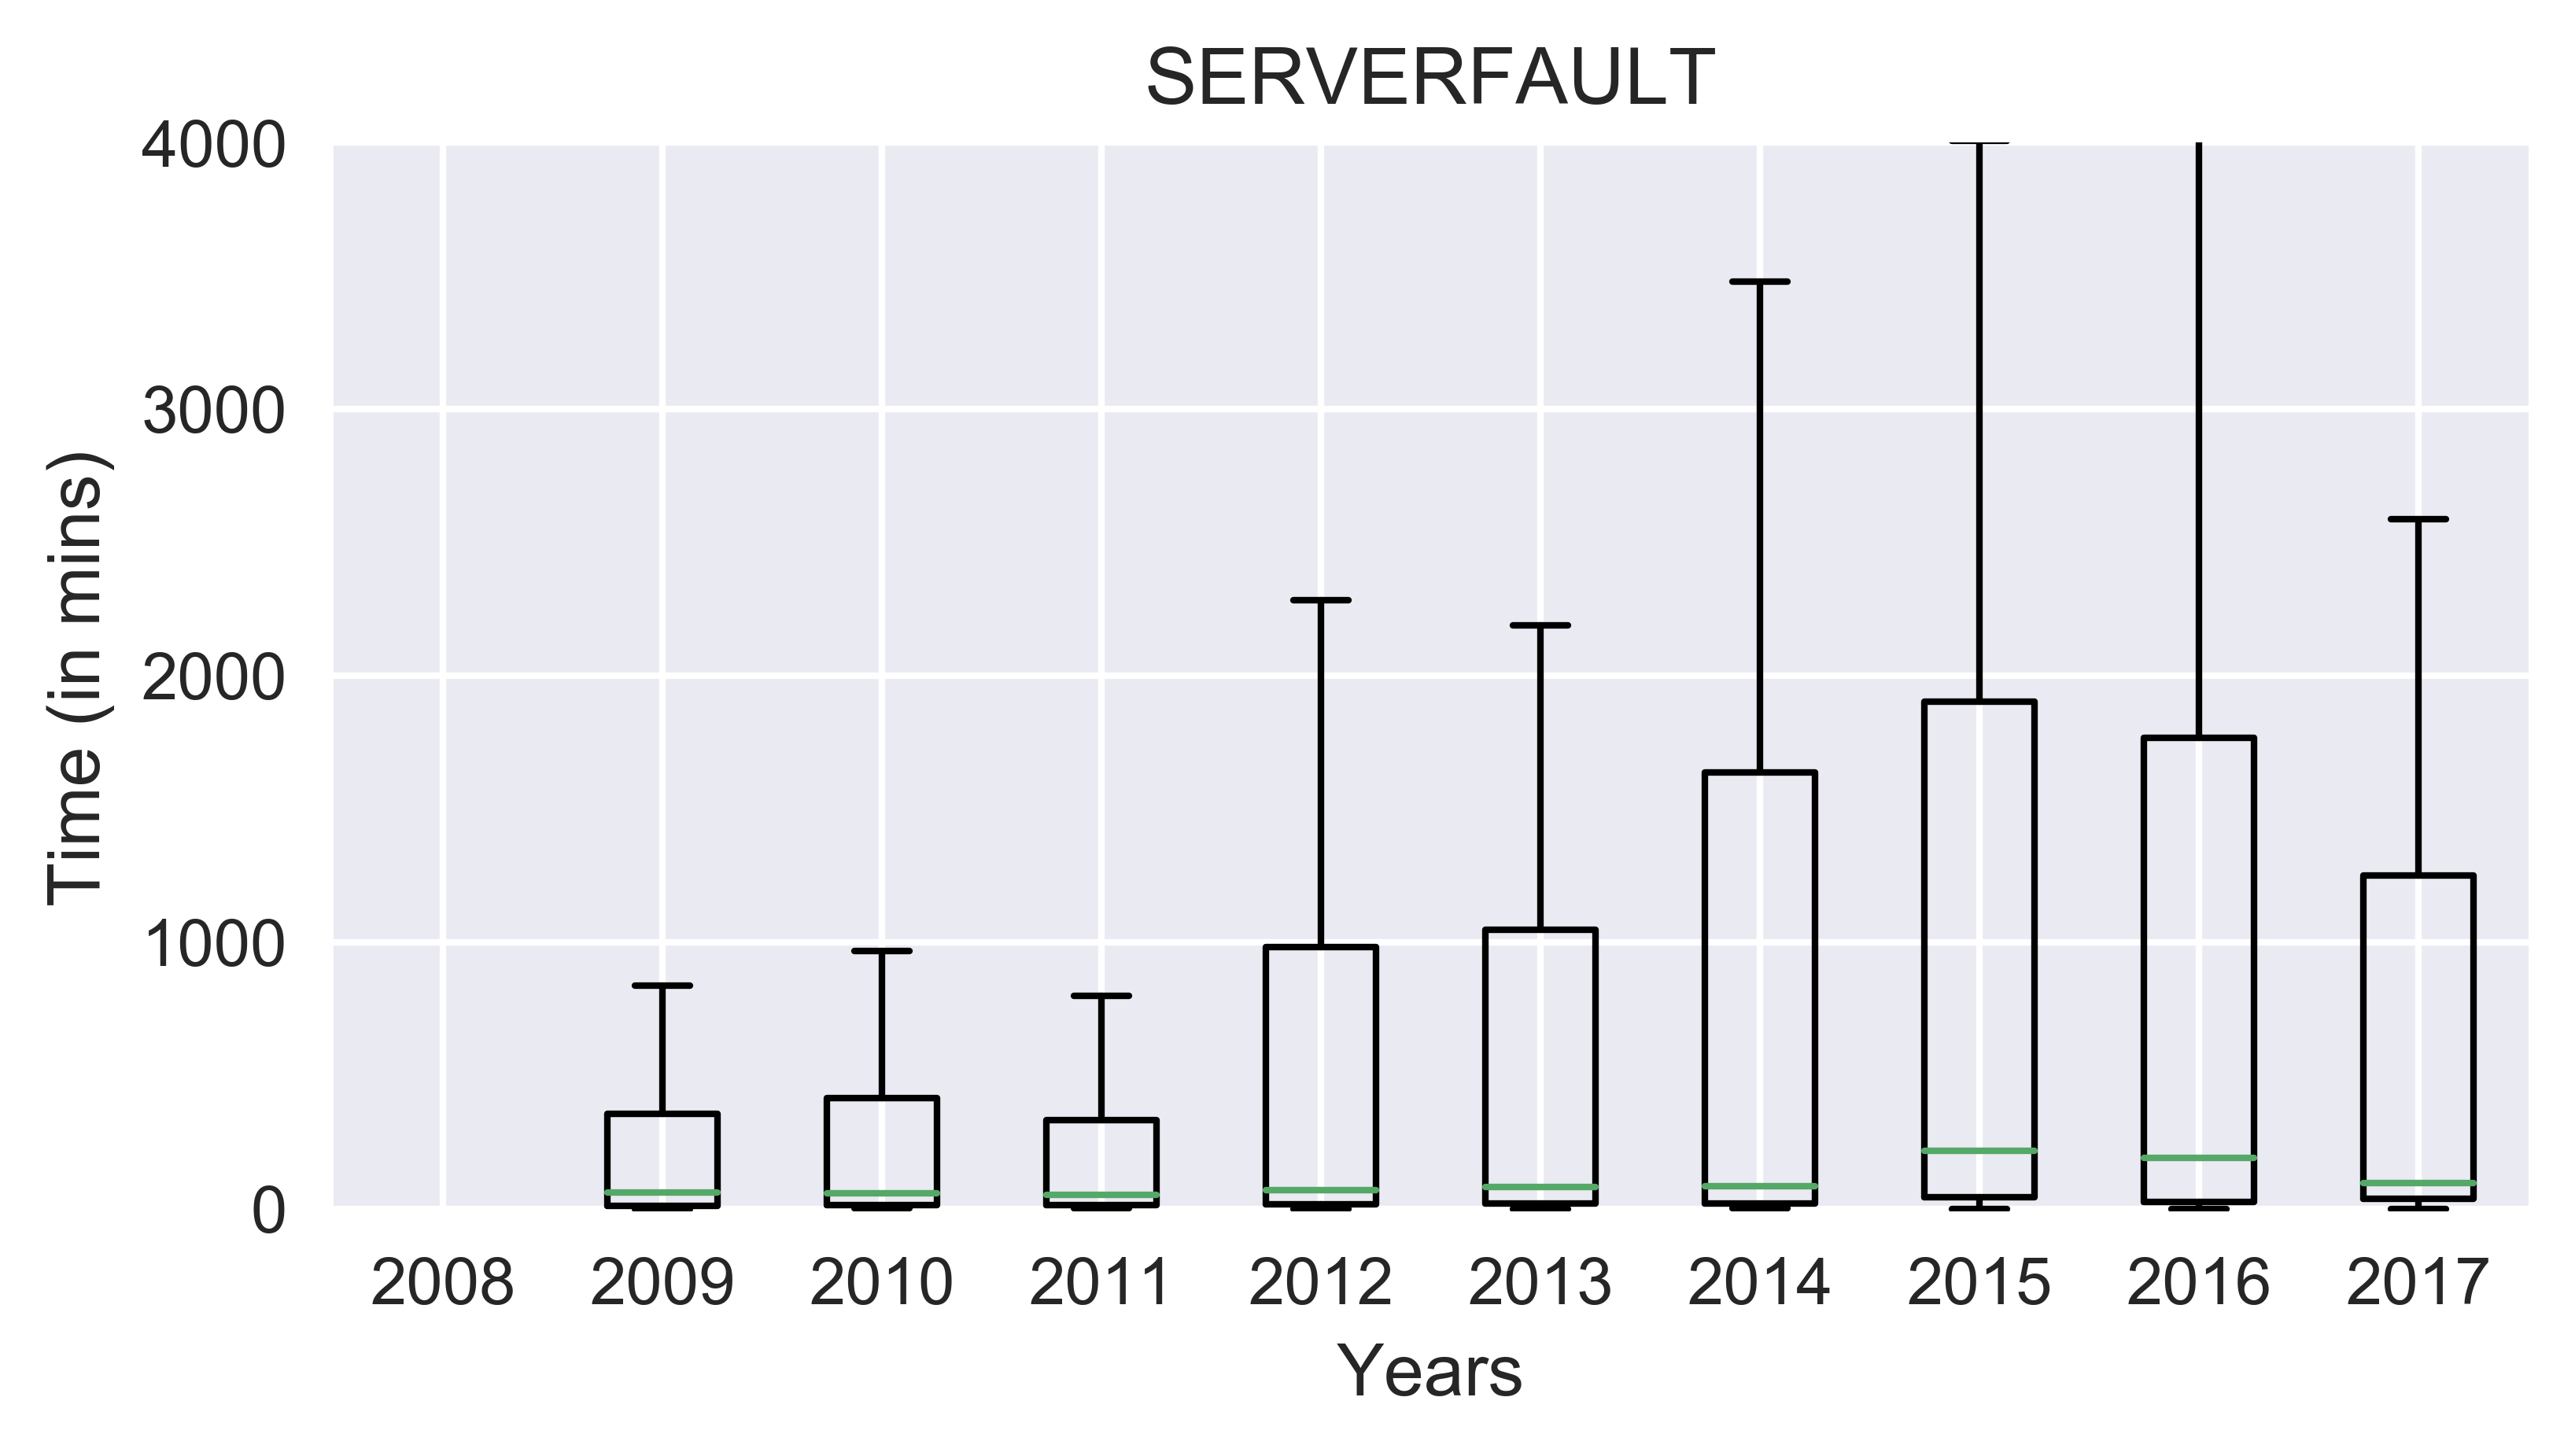

3.0 541.0 0.5545286506469501
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


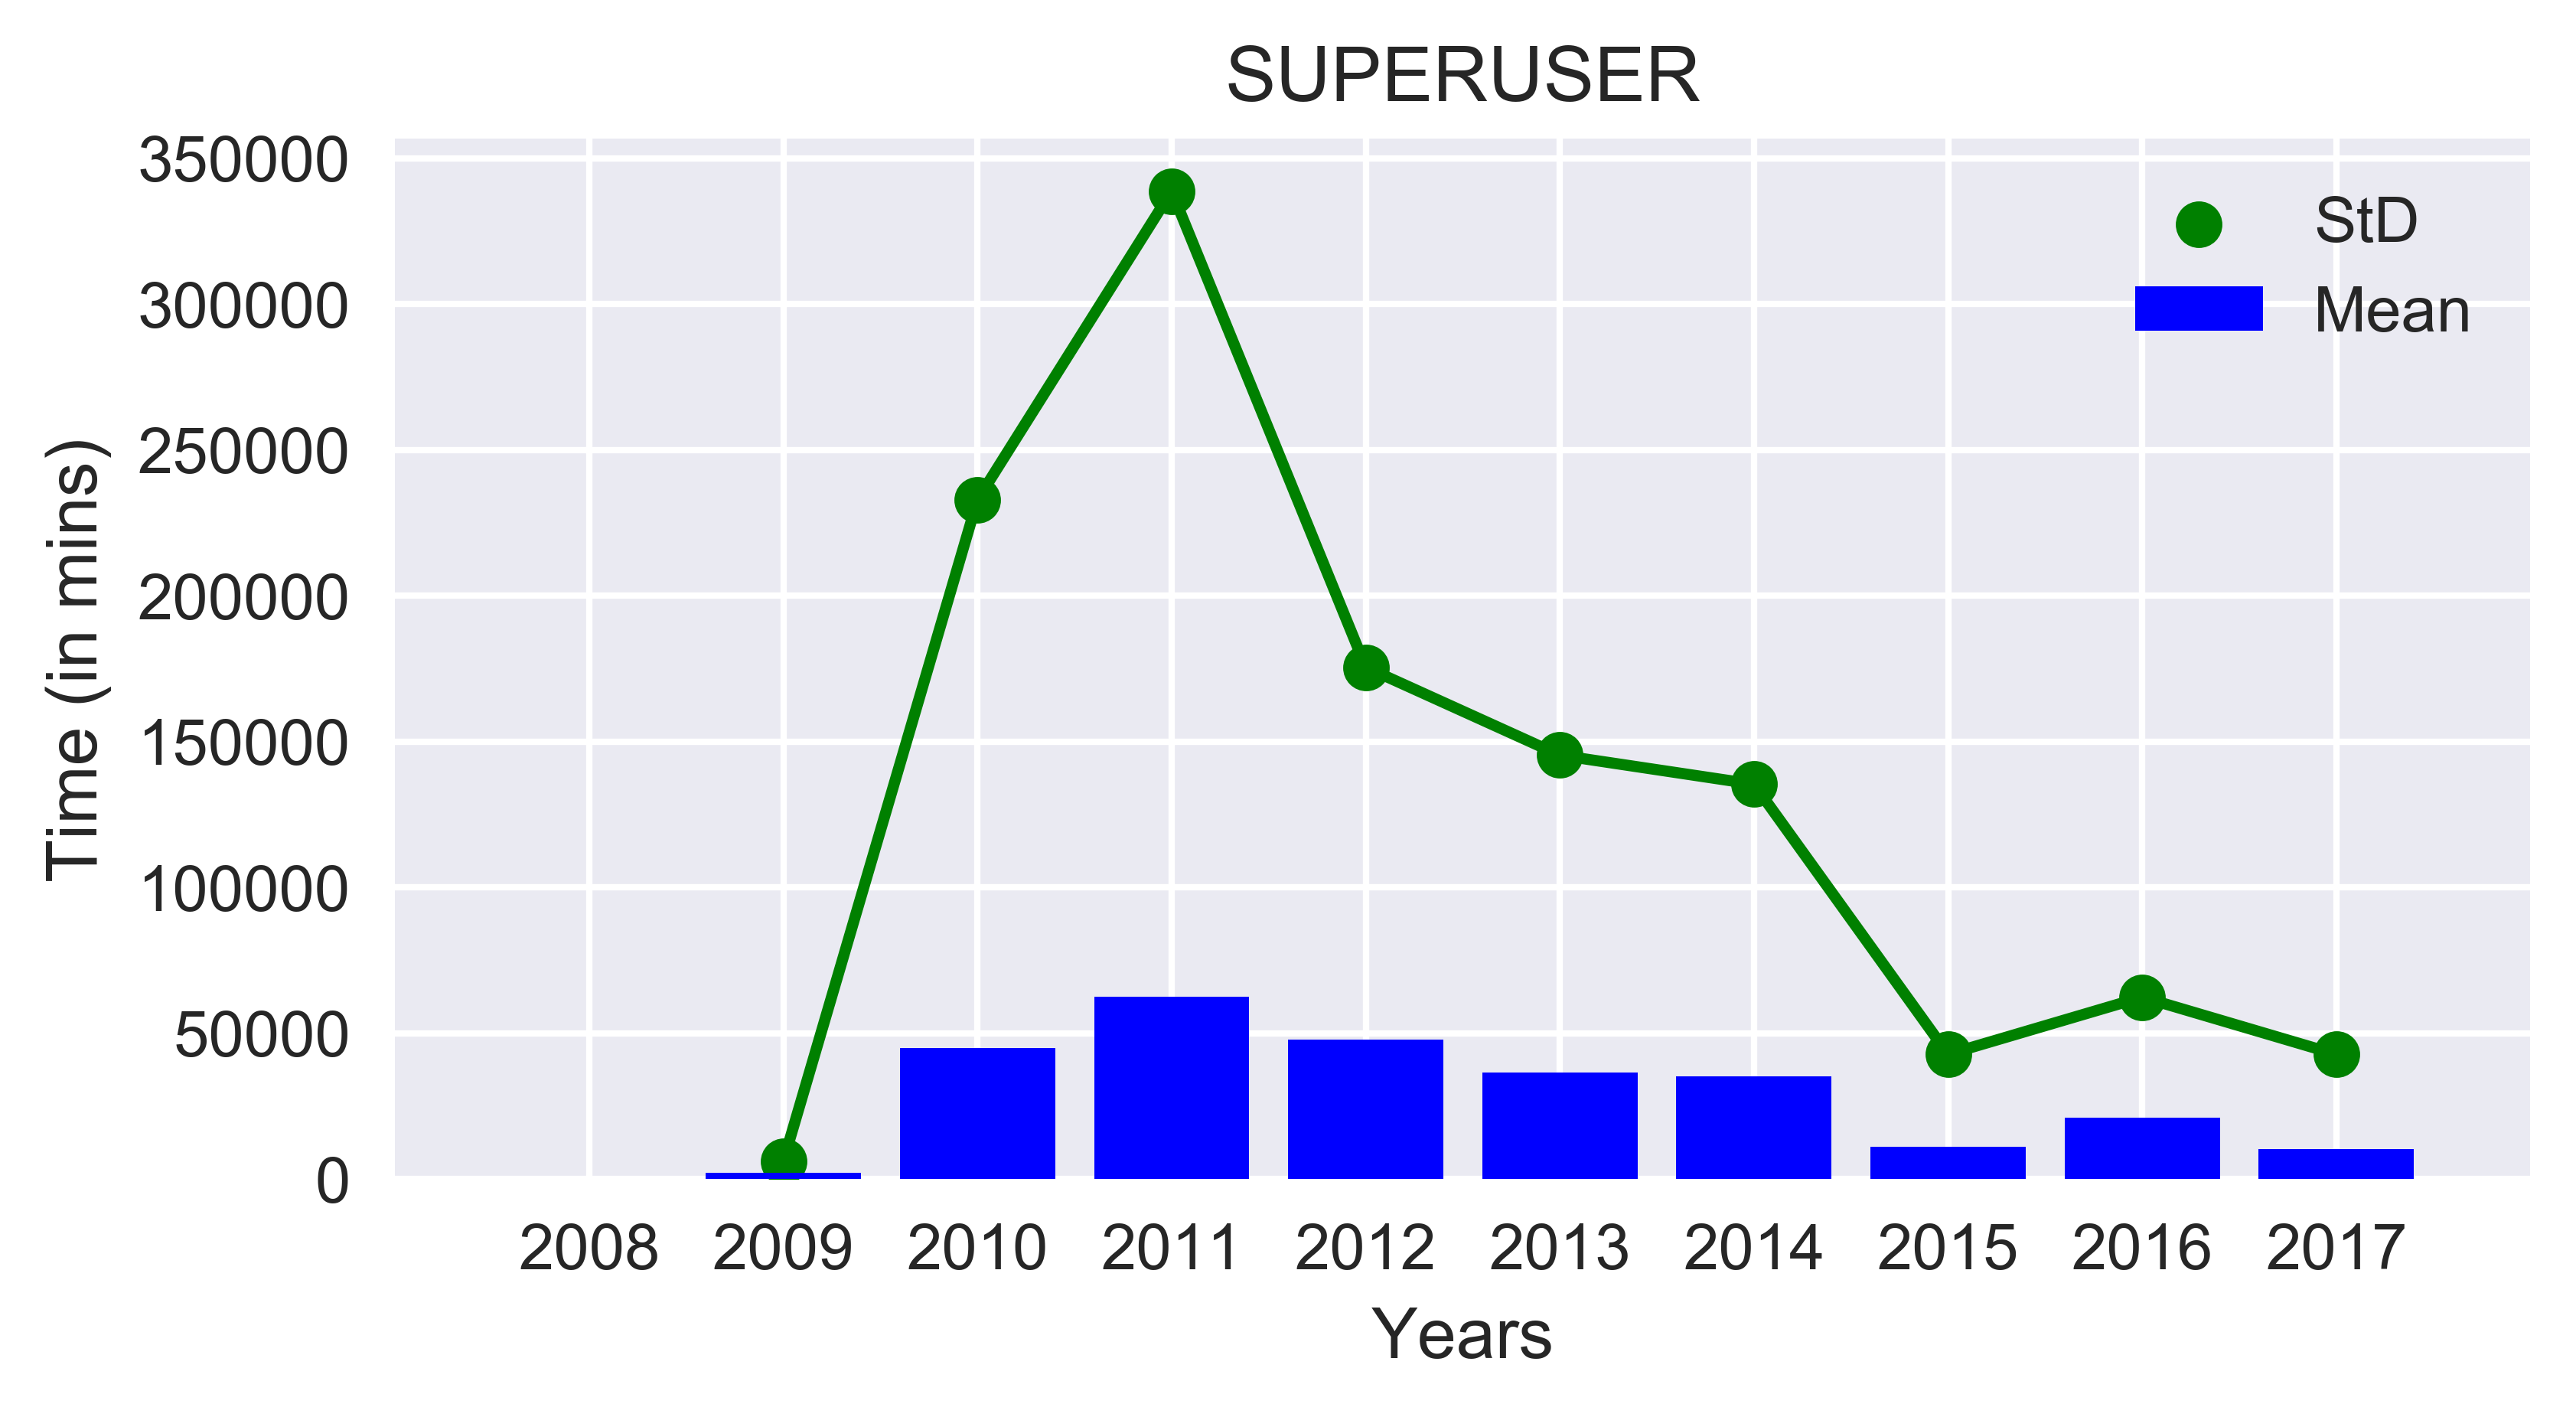

nan nan nan nan nan
2.20633333333 473.663116667 8.91596666667 26.8685833333 258.899204167
1.30083333333 1253.02316667 14.1757333333 106.624616667 609.119666667
1.20745 755.17945 16.153 49.489 321.807283333
1.04633333333 11546.7026667 32.5111583333 114.5385 4646.91347083
2.95556666667 2858.57405 33.0516666667 173.265333333 1181.47678333
0.0 4196.27755 17.75295 147.21995 1839.43978333
0.0 4605.23983333 68.2564125 268.519416667 1977.82288333
3.37056666667 3140.68183333 38.4095583333 173.702333333 2974.65695833
5.85778333333 1237.05128333 32.2591166667 159.59805 548.316216667


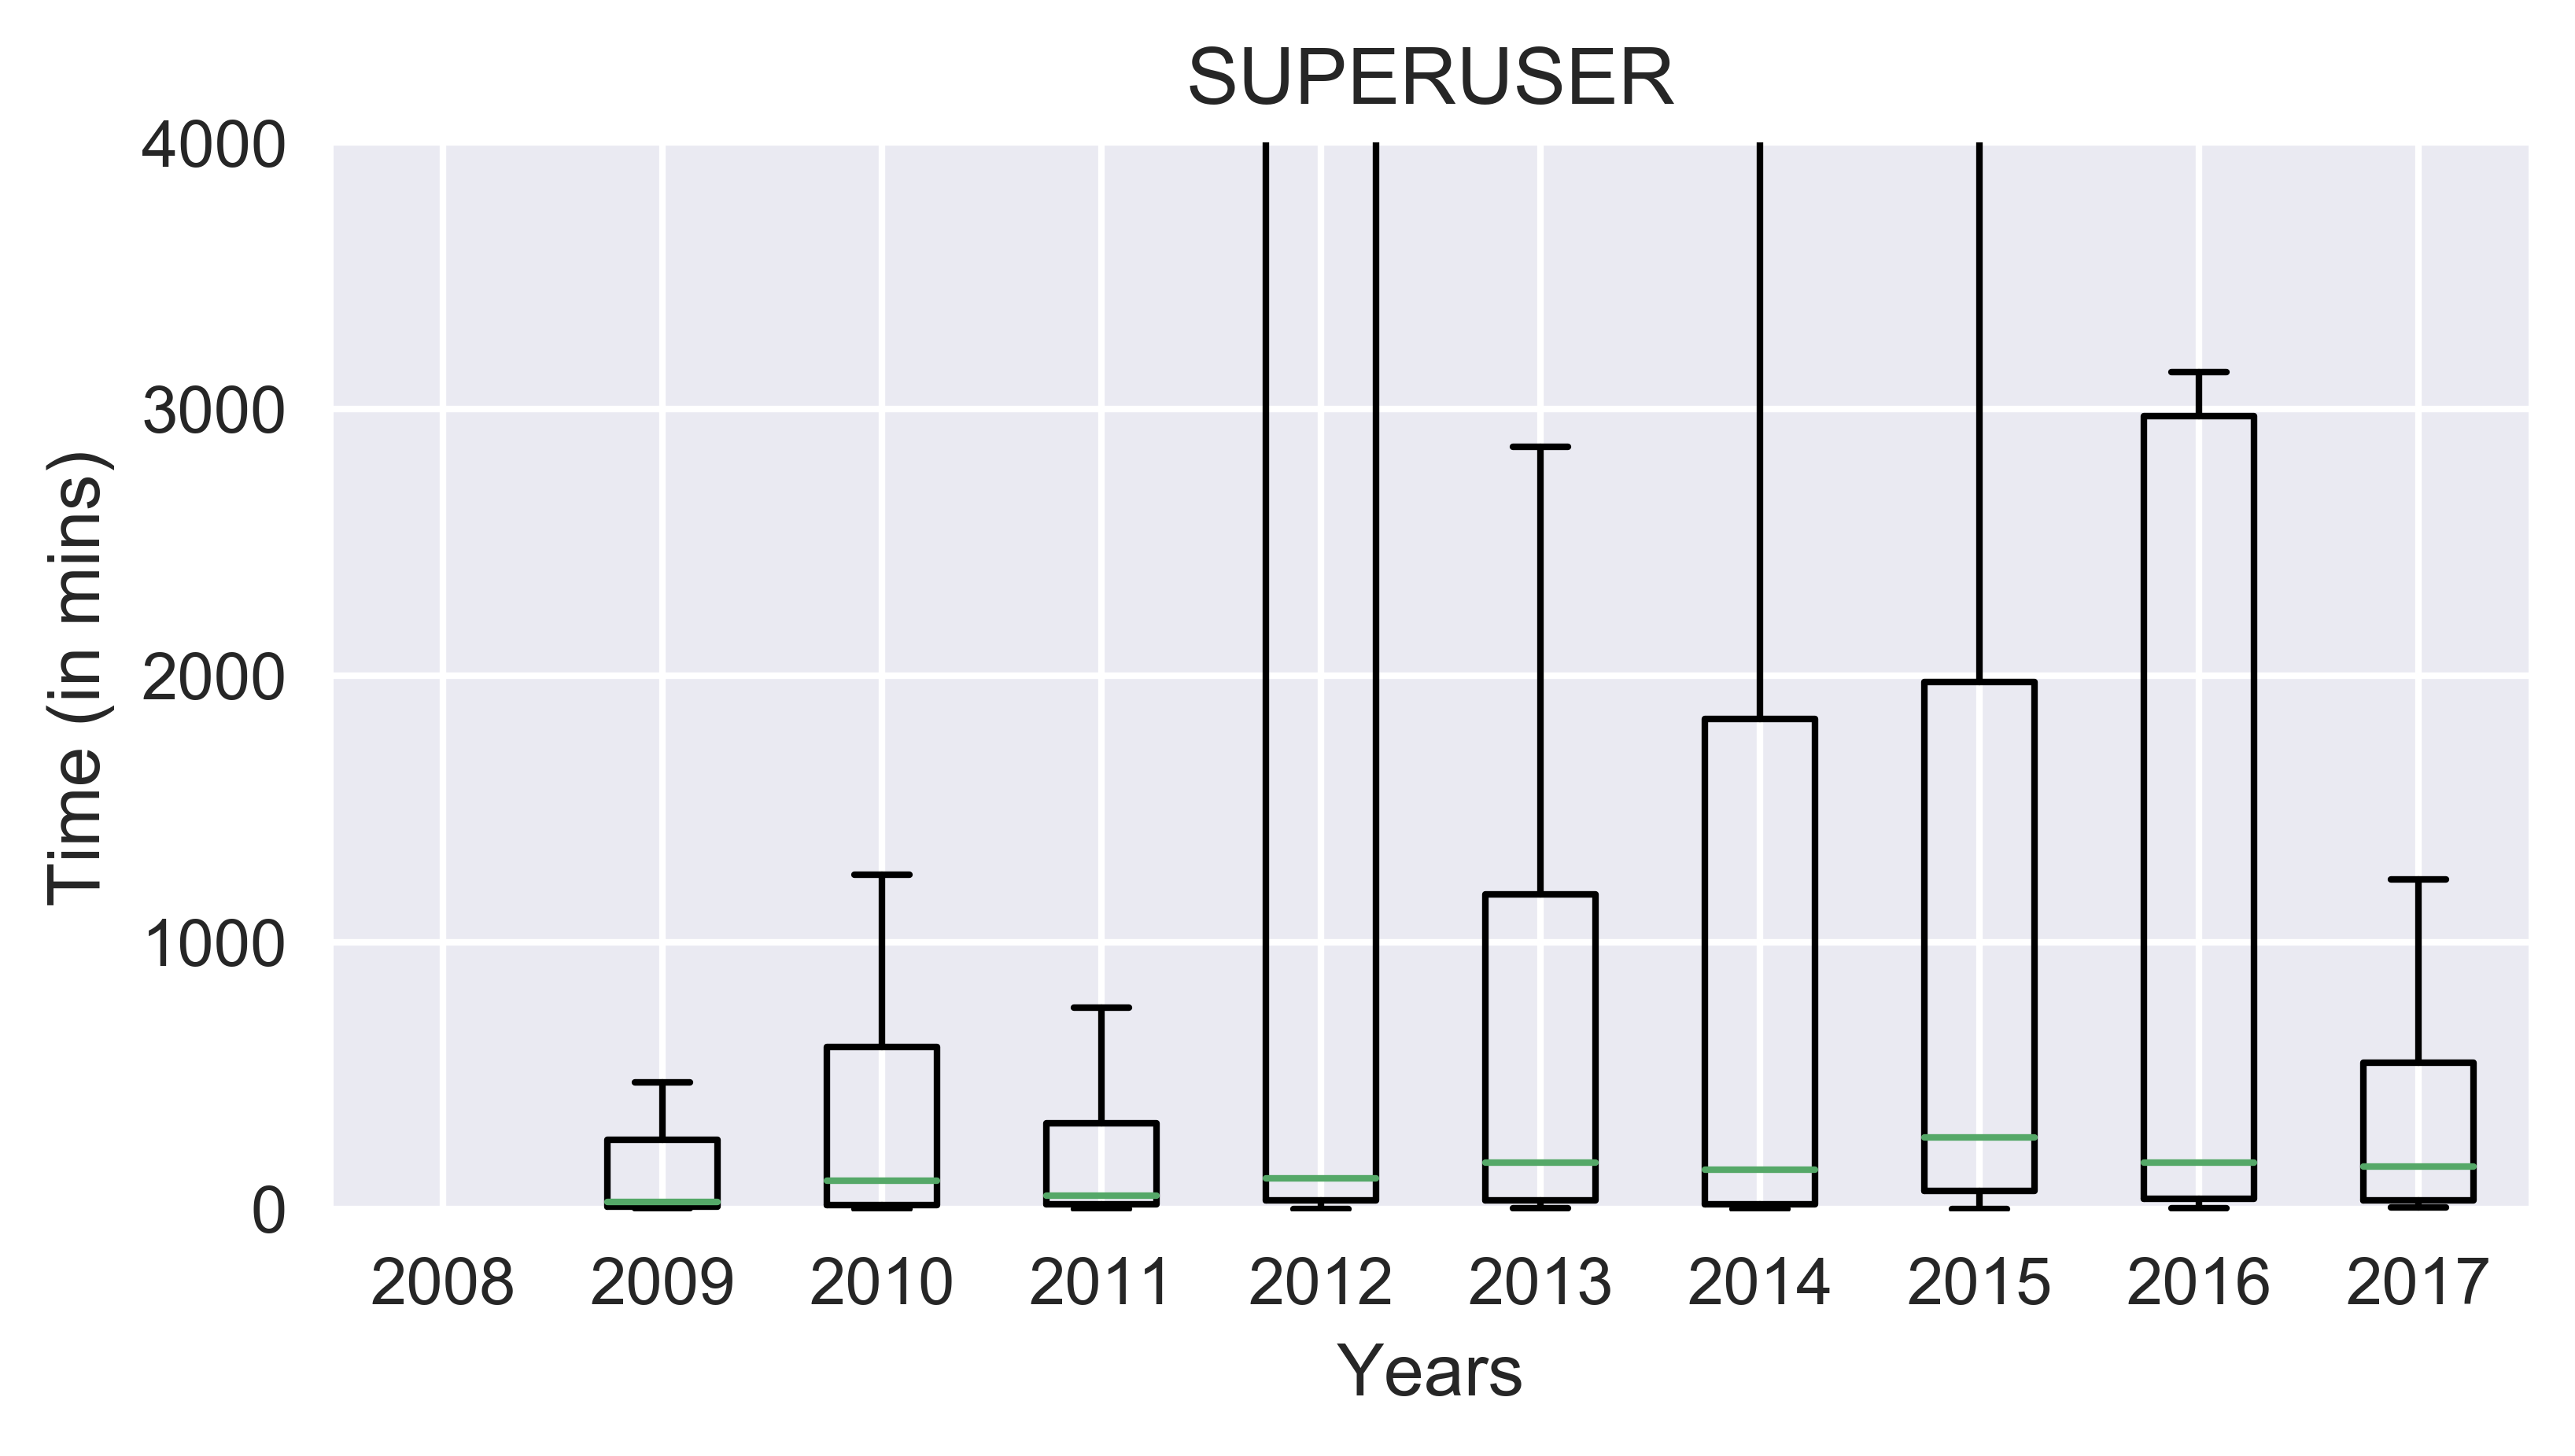

156.0 39673.0 0.39321452877271695
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


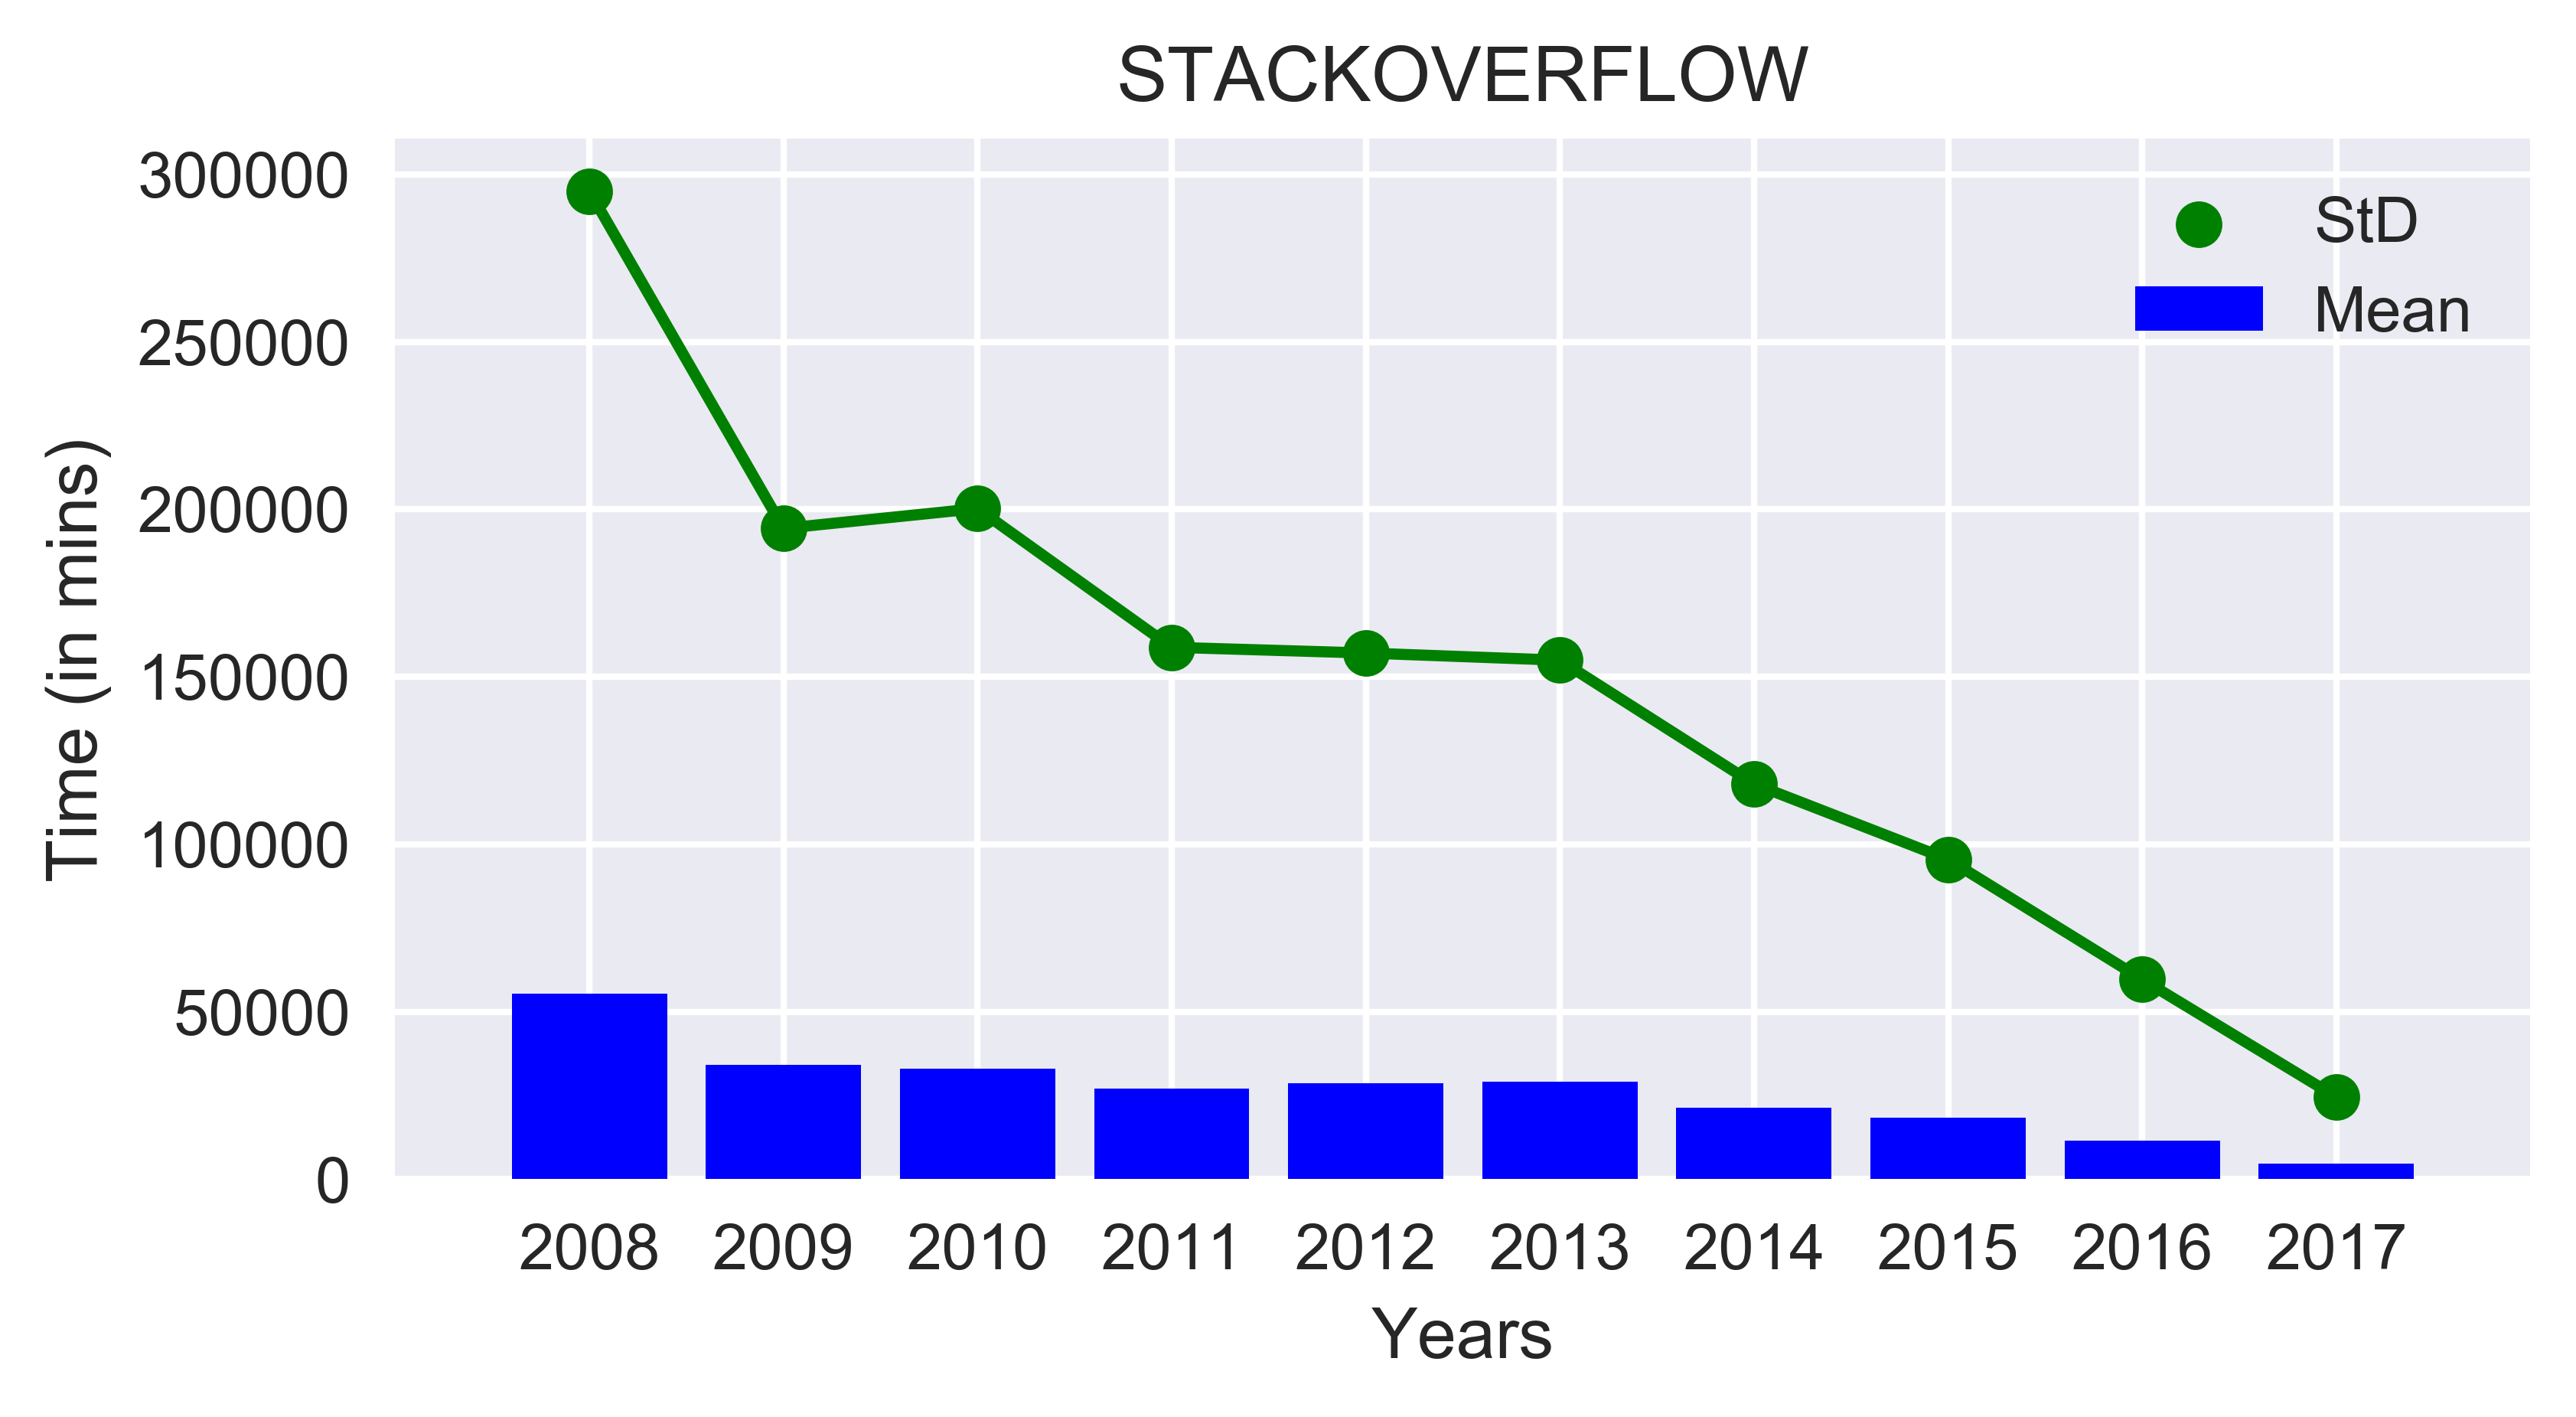

0.223883333333 1555.68816667 9.95087083333 45.4762166667 683.17275
0.72 1013.7289 10.3192666667 39.9726416667 413.880966667
0.7489 1632.02183333 11.2505041667 47.7187 672.804191667
0.881 1828.64595 10.4178541667 46.963525 741.1905625
0.0 2693.26966667 12.5574416667 65.412925 1092.9067125
0.0 2841.56106667 13.4470583333 78.4331083333 1146.79029167
0.0 2759.08883333 20.1022333333 111.942116667 1116.39855
0.0 3208.3375 23.8009333333 139.911641667 1308.52677917
0.0 3300.37193333 25.80245 151.855883333 1338.63858333
0.0 3115.2124 29.4878333333 176.5016 1265.78245


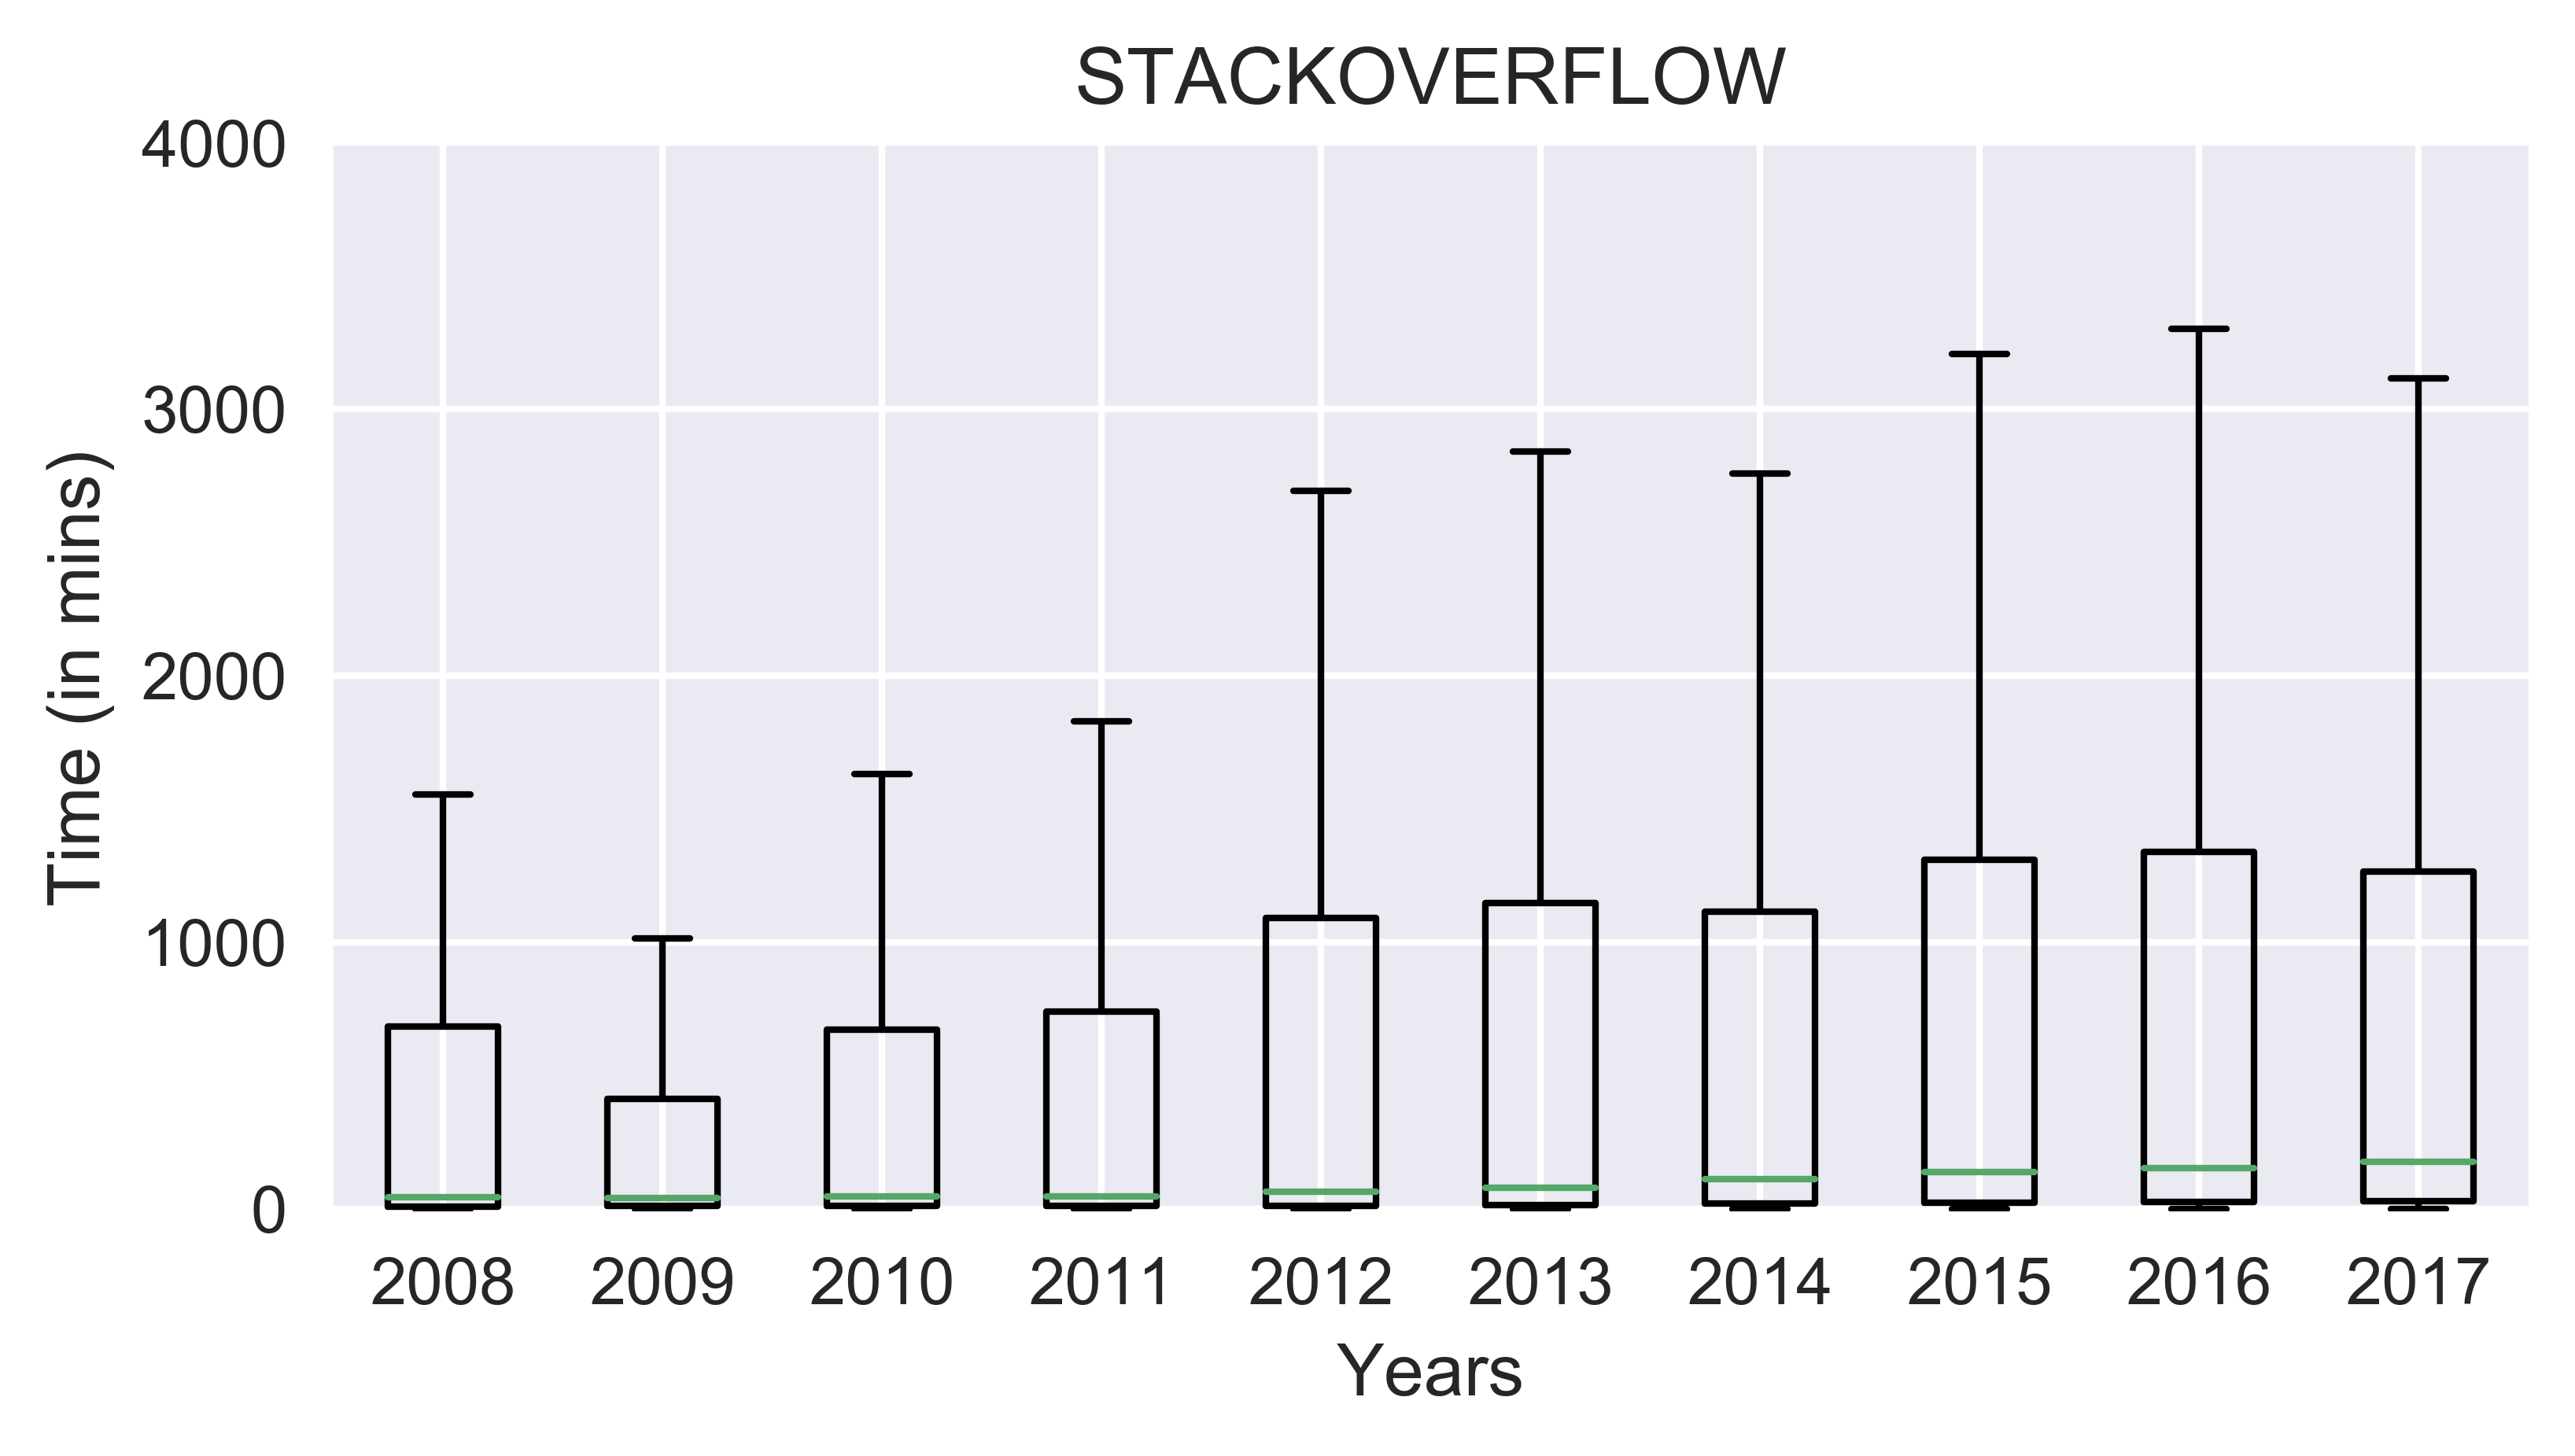

In [10]:
ym={"1":"2008","2":"2009","3":"2010","4":"2011","5":"2012","6":"2013","7":"2014","8":"2015","9":"2016","10":"2017"}
for fname in list(datamap.keys()):
    distribute_posts(fname)
